<a href="https://colab.research.google.com/github/salaghati/Thesis/blob/main/Longterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task:
1.Chia các cột ra nam / nữ ở các cột đánh giá bản thân/đối phương trong mối quan hệ (done)(Tú)
2.Tìm hiểu về điểm số 4 và 5 trong cột "Current - Mối quan hệ gia đình không tốt"(done) (Tú)
3.Đưa ra các điểm đánh giá về Big Five từ .5 thành thag điiểm 1 tới 5 (Minh)
4.Tìm hiểu xem bộ dữ liệu người nhưu thế nào dựa trên big five (Tú)
5.Tìm kiếm các bài báo chỉ ra được tài chính ảnh hưởng tới khả năng làm cha mẹ và mong muốn có con(Minh)
6.Apply Random Forest(Chưa rõ)
7.Chỉnh bins trong thu nhập thành 1 mảng(chưa rõ)
8.Chia các cột ra nam / nữ ở các cột đánh giá bản thân/đối phương lúc chia tay (Tú)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel('Updated_Score_final.xlsx')

In [ ]:
columns_to_convert = [
    "Giới tính của bạn:",
    "Trình độ học vấn cao nhất của bạn? ",
    "Đặc điểm chung của gia đình hai bên\n",
    "Bạn đã từng hẹn hò/quen người khác trước khi trong mối quan hệ hiện tại?",  # Giả sử cột này tồn tại
    "Bạn nhận khảo sát từ ai ?"
]

# Chuyển đổi các cột này sang kiểu dữ liệu 'category'
for col in columns_to_convert:
    if col in data.columns:
        data[col] = data[col].astype('category')

# Kiểm tra kiểu dữ liệu của các cột sau khi chuyển đổi
print(data[columns_to_convert].dtypes)

Giới tính của bạn:                                                          category
Trình độ học vấn cao nhất của bạn?                                          category
Đặc điểm chung của gia đình hai bên\n                                       category
Bạn đã từng hẹn hò/quen người khác trước khi trong mối quan hệ hiện tại?    category
Bạn nhận khảo sát từ ai ?                                                   category
dtype: object


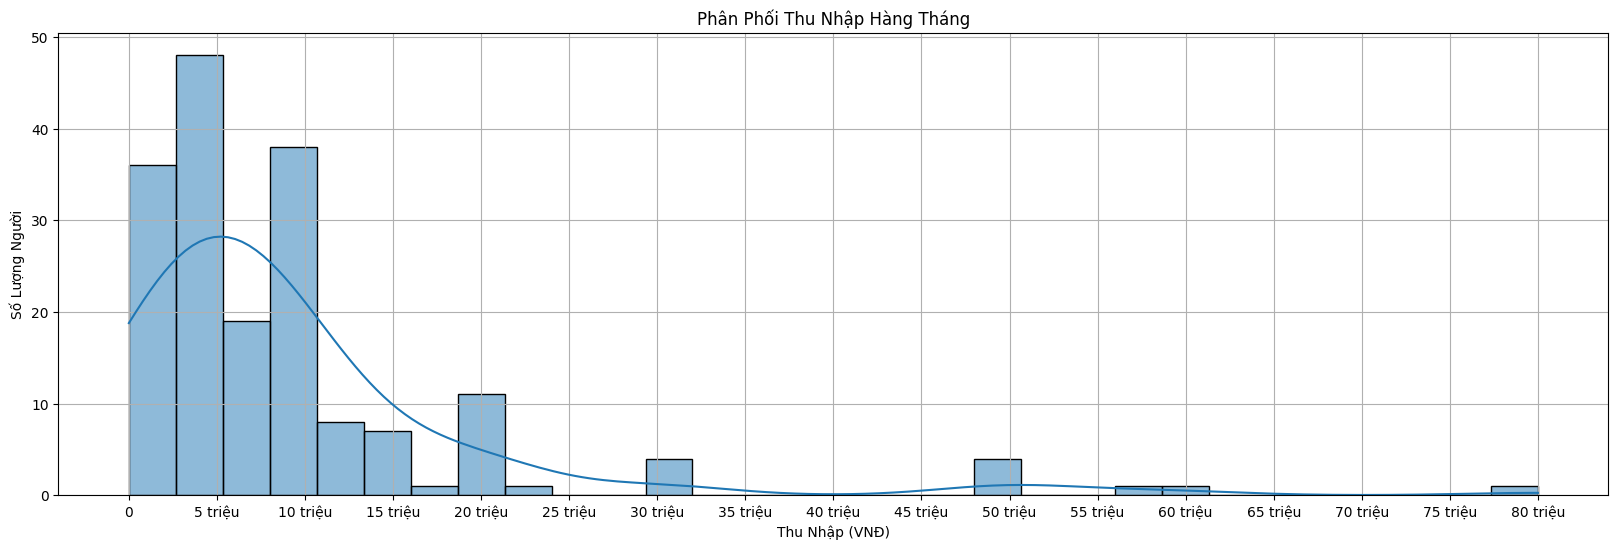

In [ ]:
# Chuyển đổi dữ liệu sang số
data['Thu nhập hàng tháng của bạn là bao nhiêu?\n(đơn vị :VNĐ)'] = pd.to_numeric(data['Thu nhập hàng tháng của bạn là bao nhiêu?\n(đơn vị :VNĐ)'], errors='coerce')

# Vẽ biểu đồ
plt.figure(figsize=(20, 6))
sns.histplot(data['Thu nhập hàng tháng của bạn là bao nhiêu?\n(đơn vị :VNĐ)'], kde=True, bins=30)
plt.title('Phân Phối Thu Nhập Hàng Tháng')
plt.xlabel('Thu Nhập (VNĐ)')
plt.ylabel('Số Lượng Người')
plt.xticks([0, 5e6, 10e6, 15e6, 20e6, 25e6, 30e6, 35e6, 40e6, 45e6, 50e6, 55e6, 60e6, 65e6, 70e6, 75e6, 80e6],
           ['0', '5 triệu', '10 triệu', '15 triệu', '20 triệu', '25 triệu', '30 triệu', '35 triệu', '40 triệu', '45 triệu', '50 triệu', '55 triệu', '60 triệu', '65 triệu', '70 triệu', '75 triệu', '80 triệu'])
plt.grid(True)
plt.show()


Nhận xét cơ bản:


*   Phần lớn người tham gia khảo sát có thu nhập hàng tháng từ khoảng 0 đến 20 triệu VND.
Số lượng người có thu nhập cao nhất (xung quanh 10 triệu VND) có vẻ nhiều nhất, tạo ra đỉnh của histogram.
Có một số ít người có thu nhập trên 30 triệu VND, với số lượng giảm dần khi thu nhập tăng.





In [ ]:
data.describe(include=['category'])

Giới tính của bạn: Trình độ học vấn cao nhất của bạn?   \
count                 185                                 185   
unique                  2                                   6   
top                   Nam                             Đại học   
freq                  102                                 147   

               Đặc điểm chung của gia đình hai bên\n  \
count                                            185   
unique                                            48   
top     Không có đặc điểm chung của hai bên gia đình   
freq                                              45   

       Bạn đã từng hẹn hò/quen người khác trước khi trong mối quan hệ hiện tại?  \
count                                                 185                         
unique                                                  2                         
top                                                    Có                         
freq                                                  111                         

       Bạn nhận khảo sát từ ai ?  
count                        117  
unique                         3  
top               Tăng Quốc Minh  
freq                          61

In [ ]:
# Selecting numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


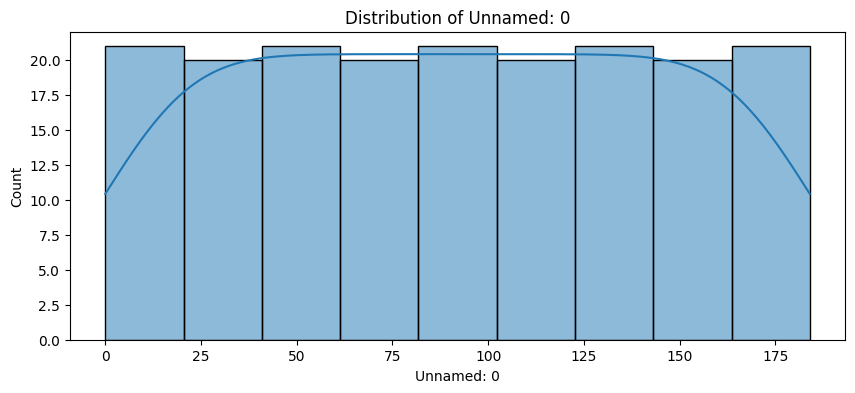

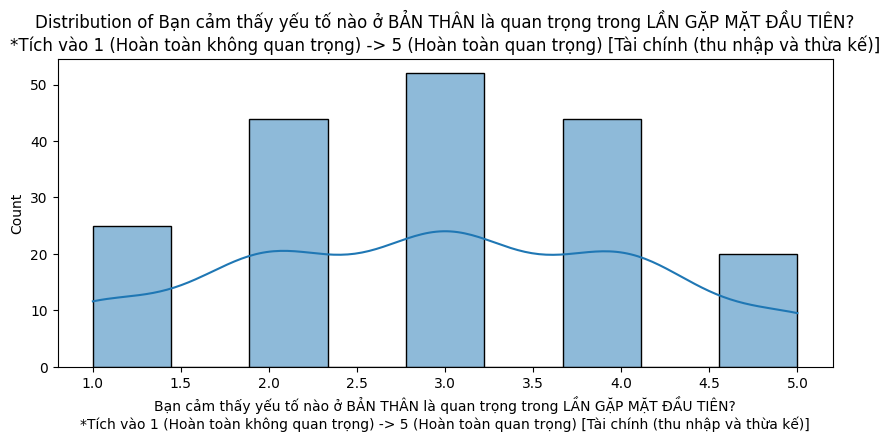

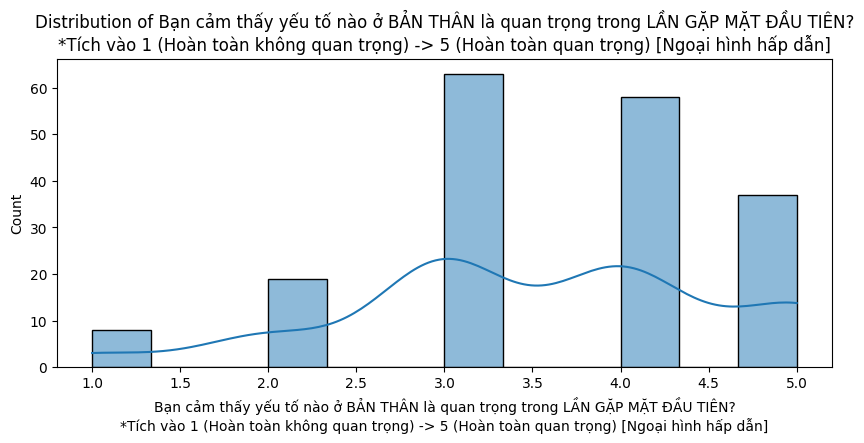

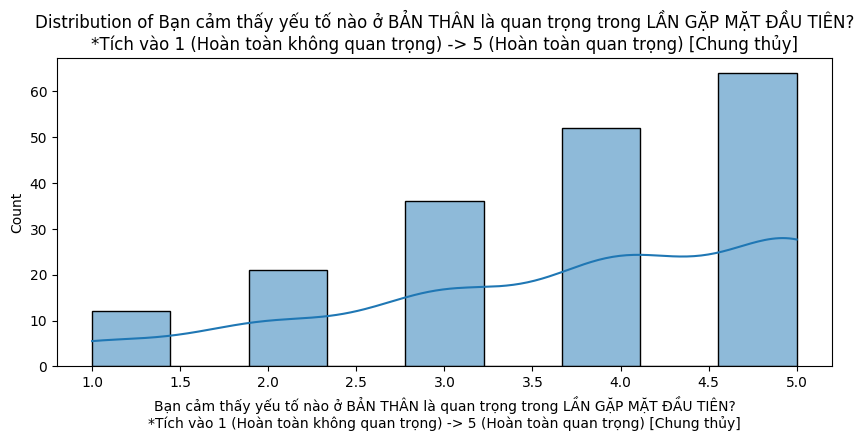

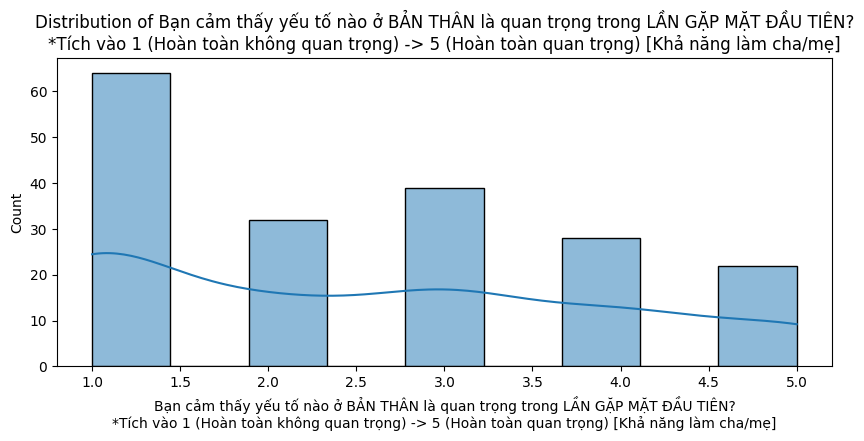

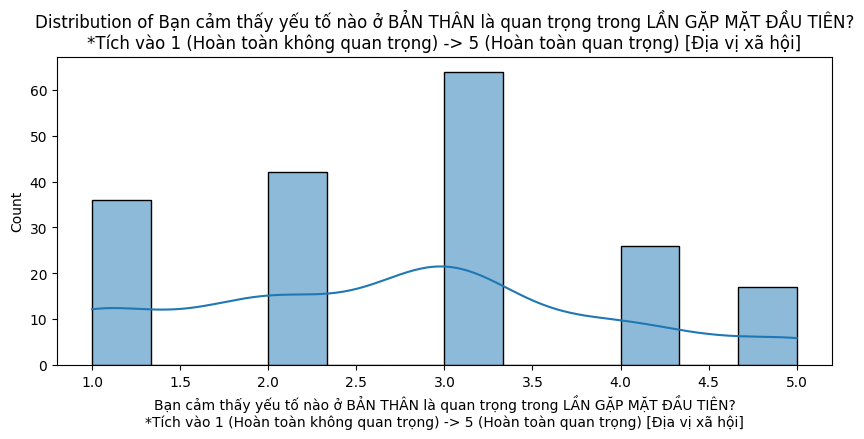

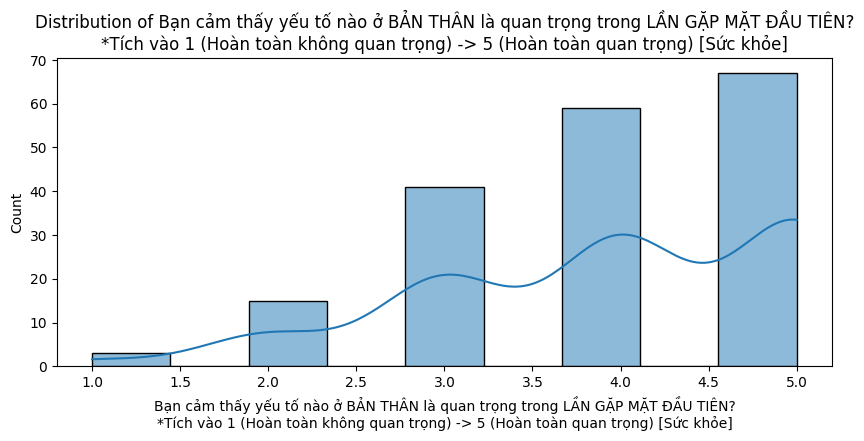

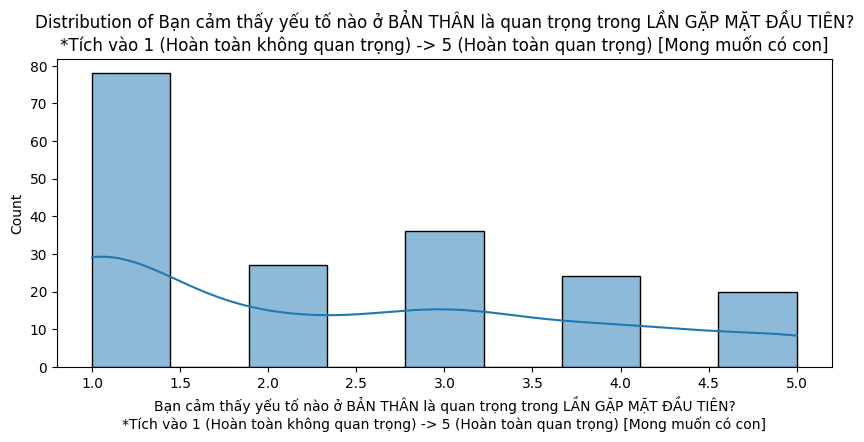

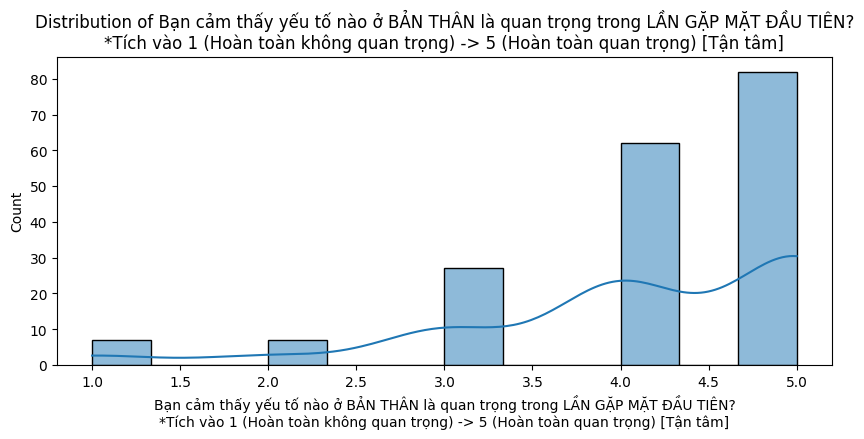

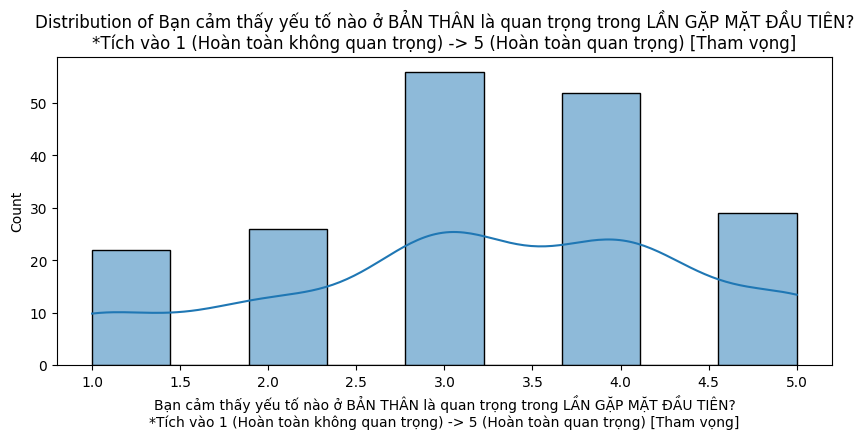

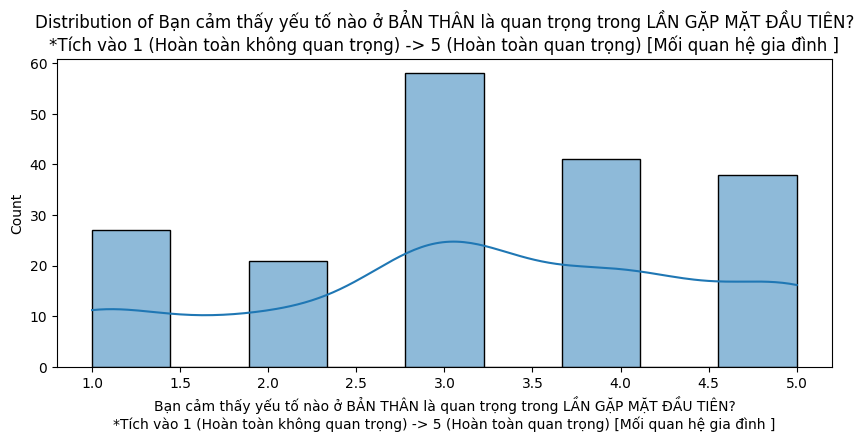

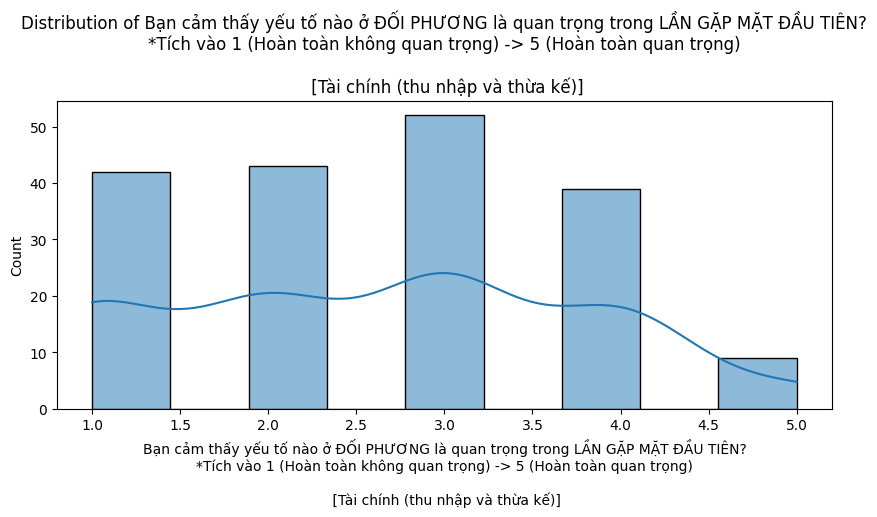

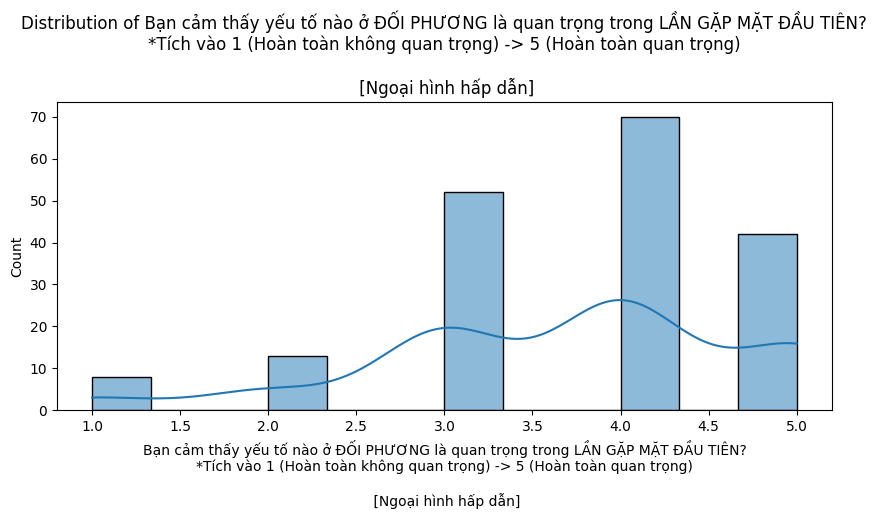

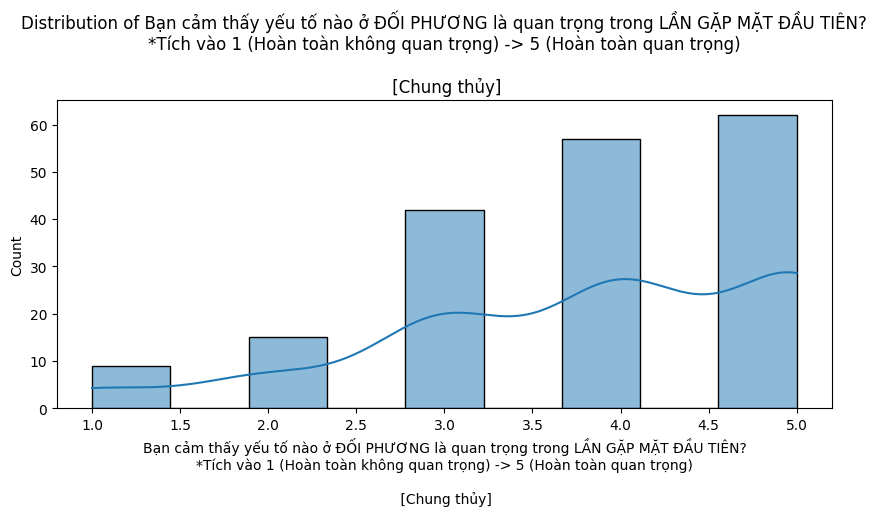

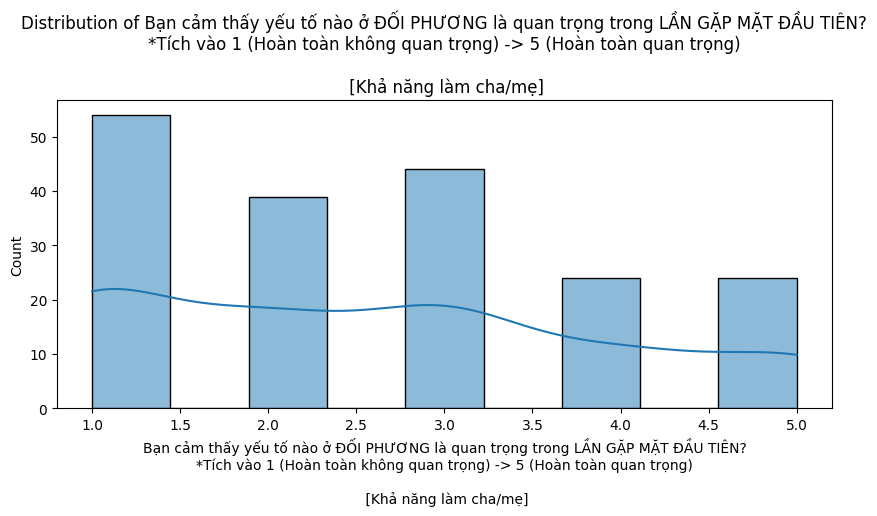

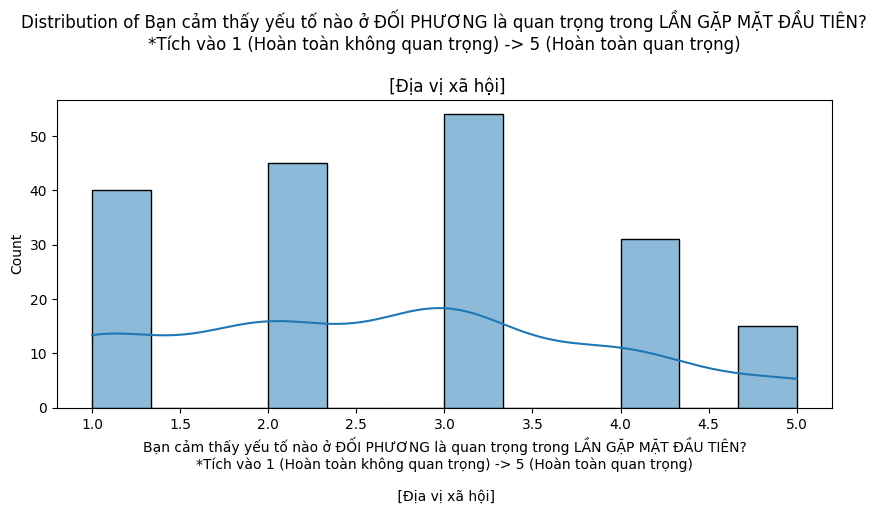

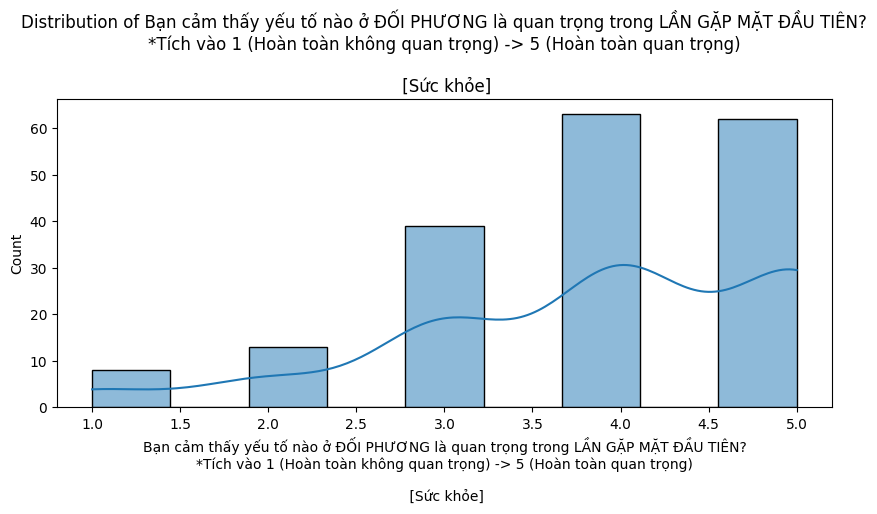

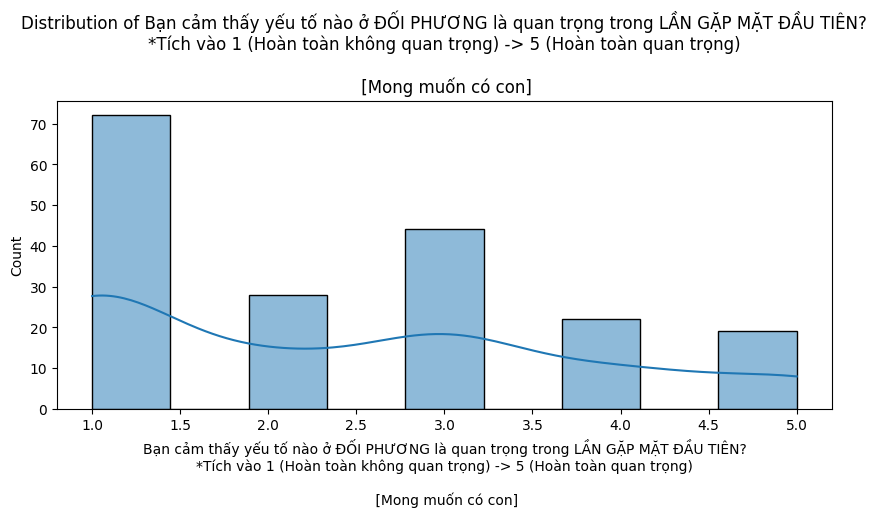

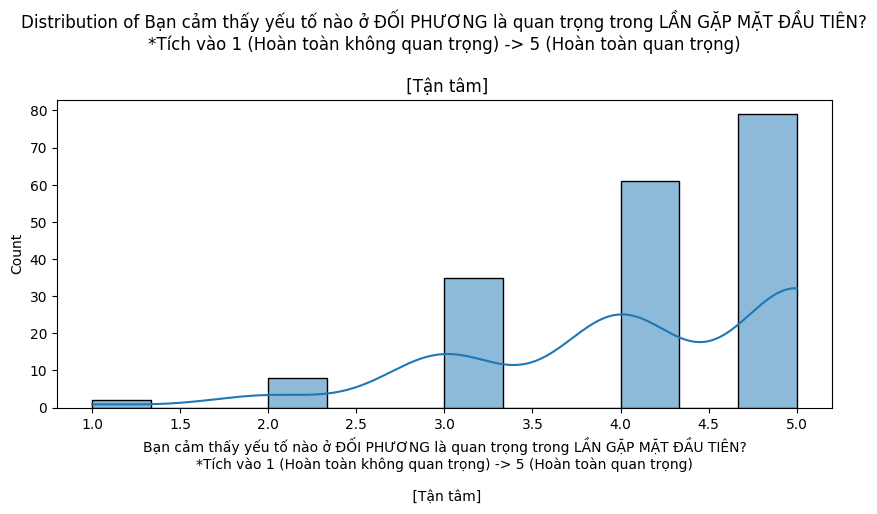

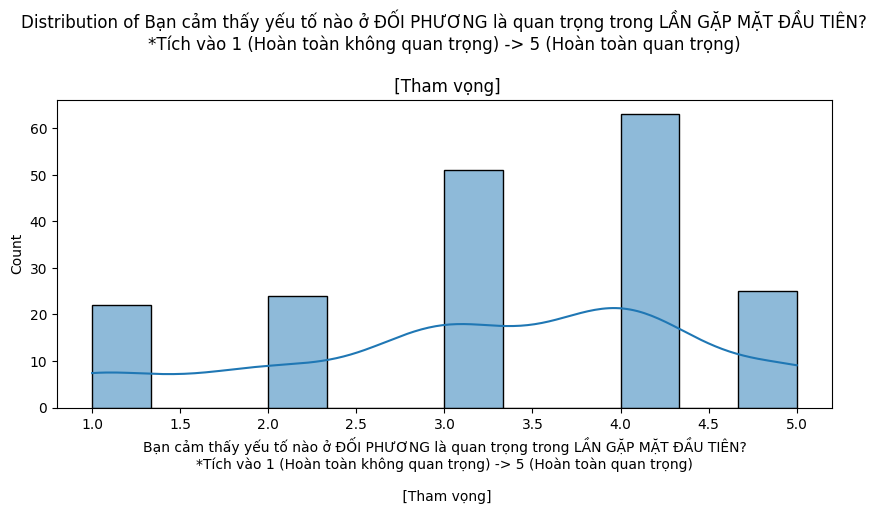

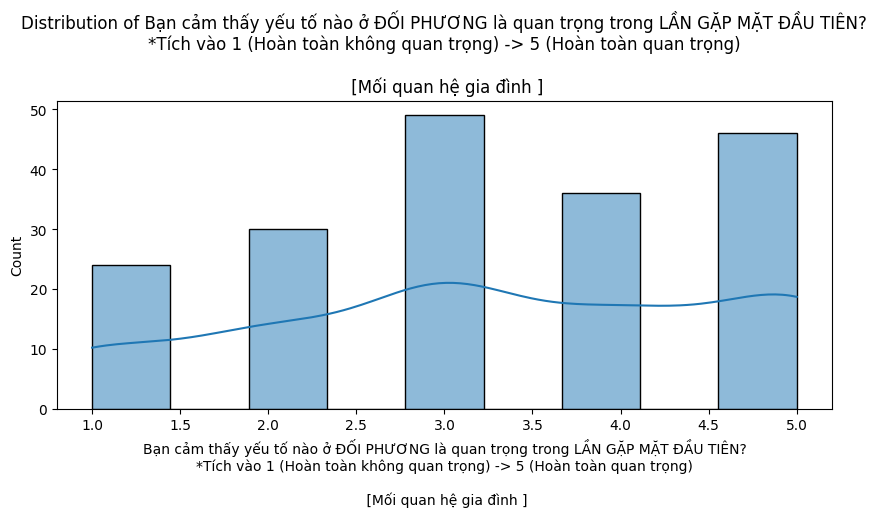

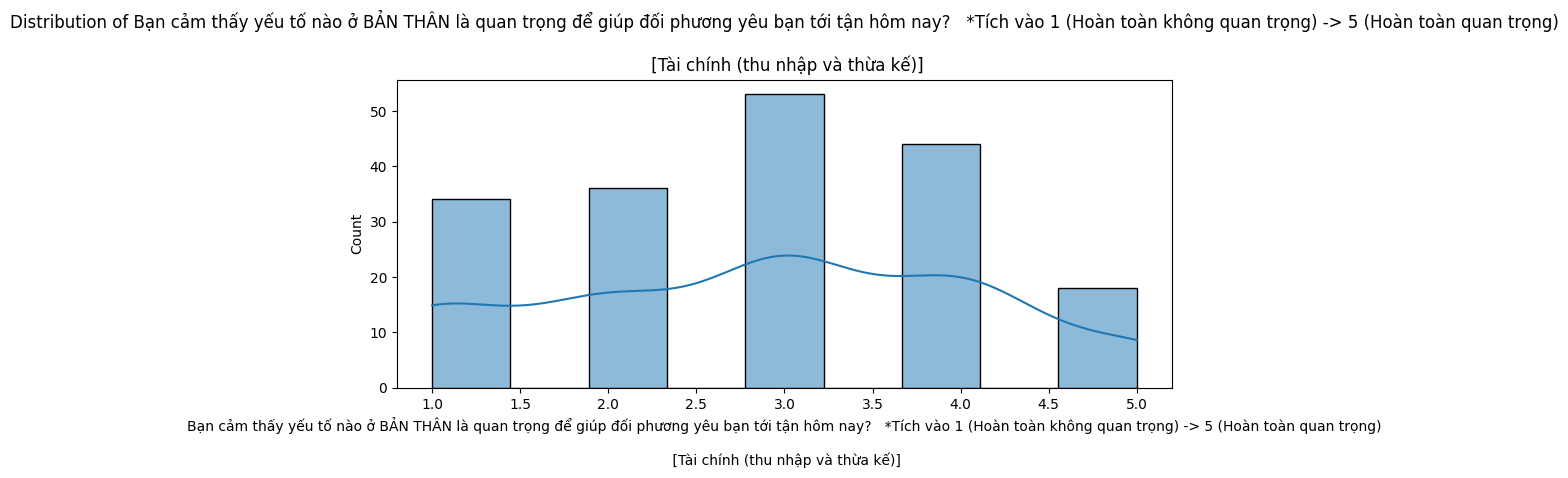

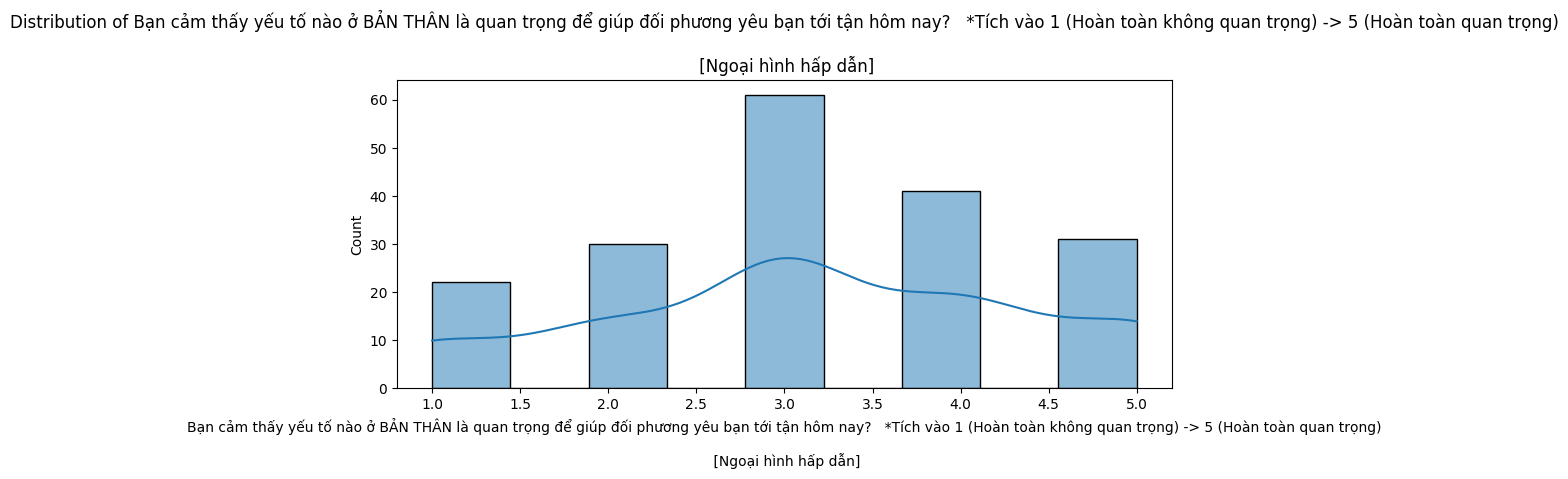

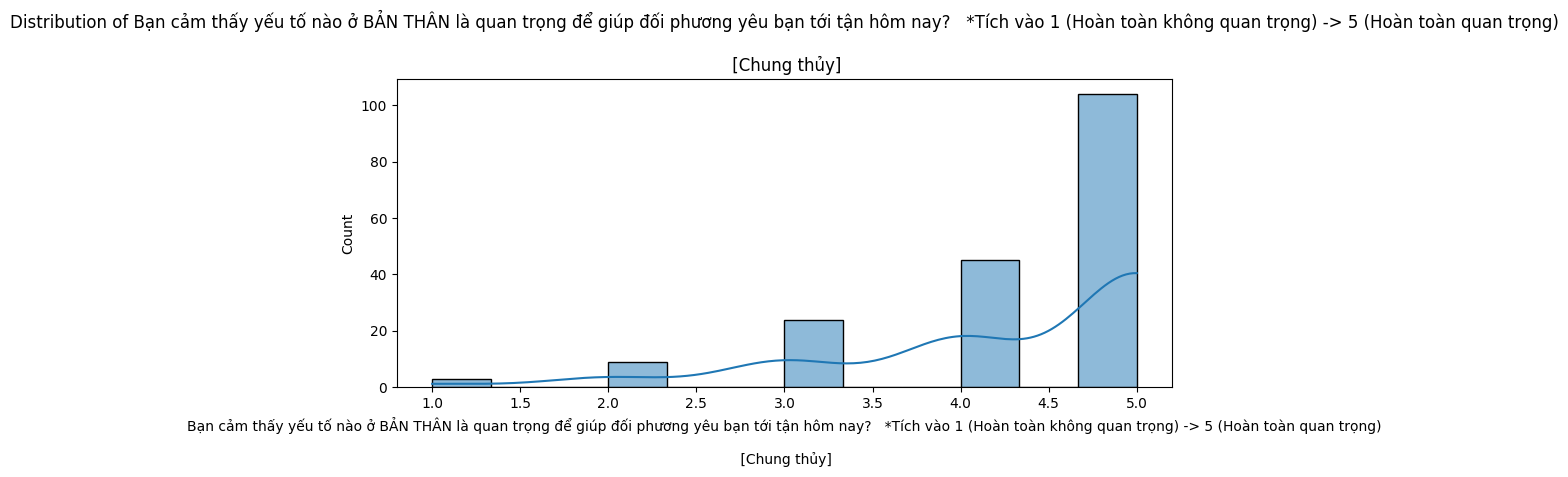

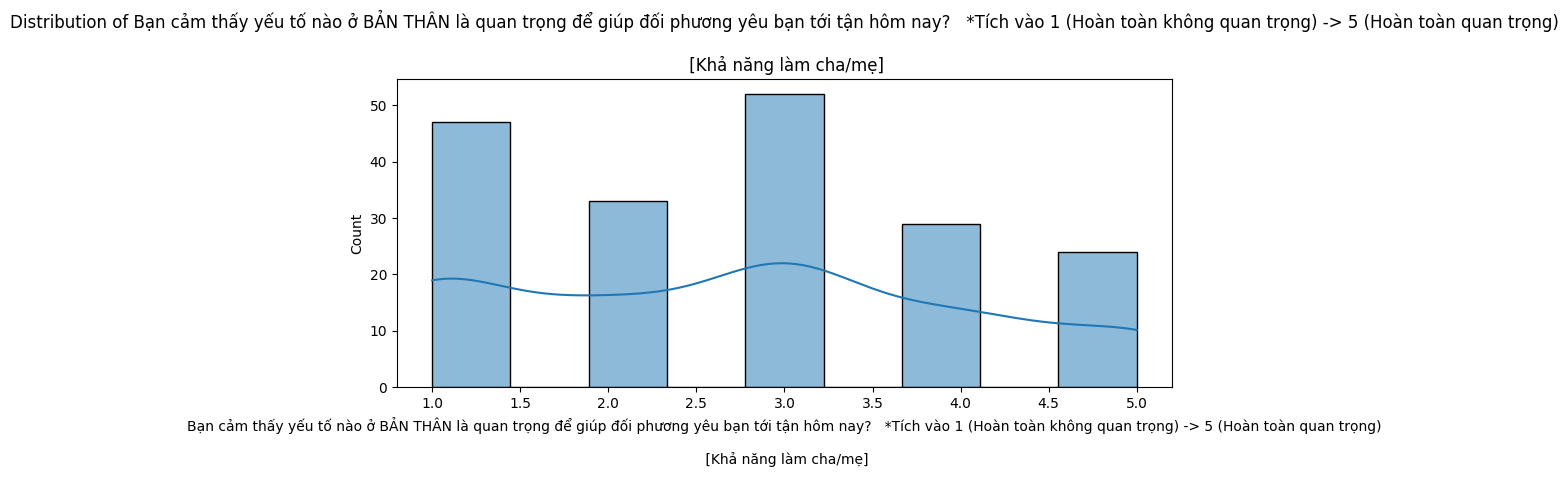

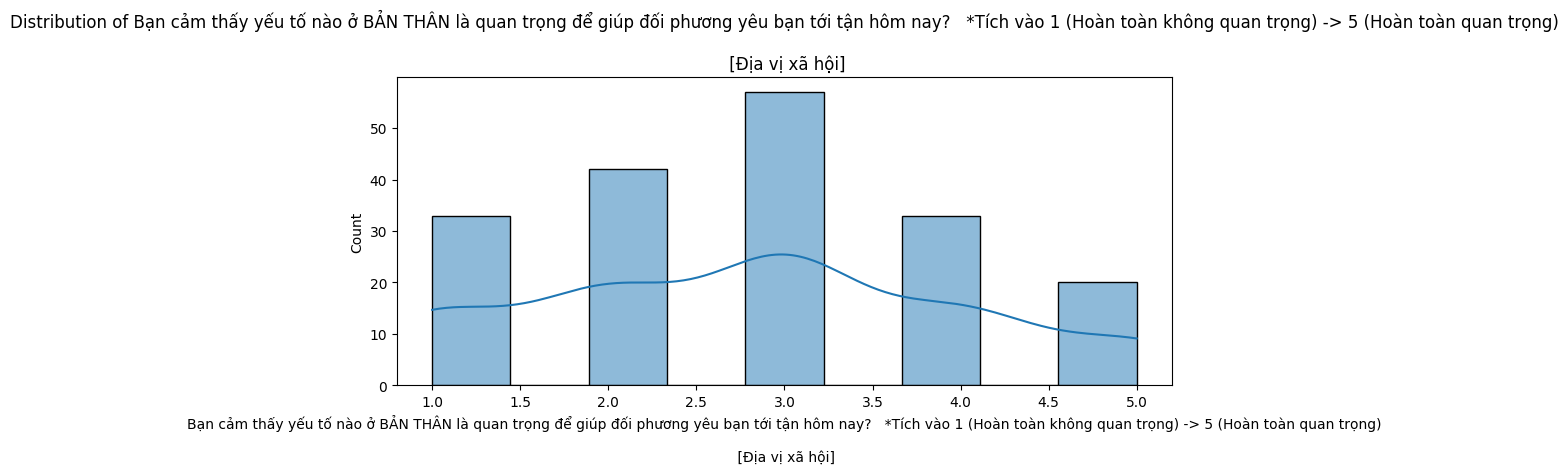

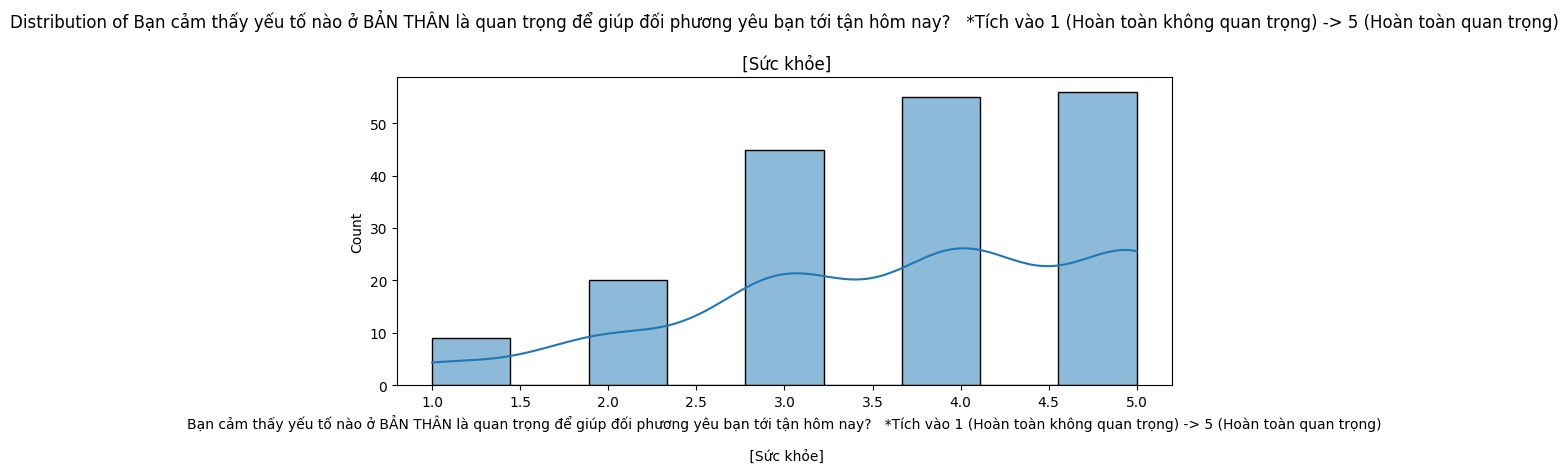

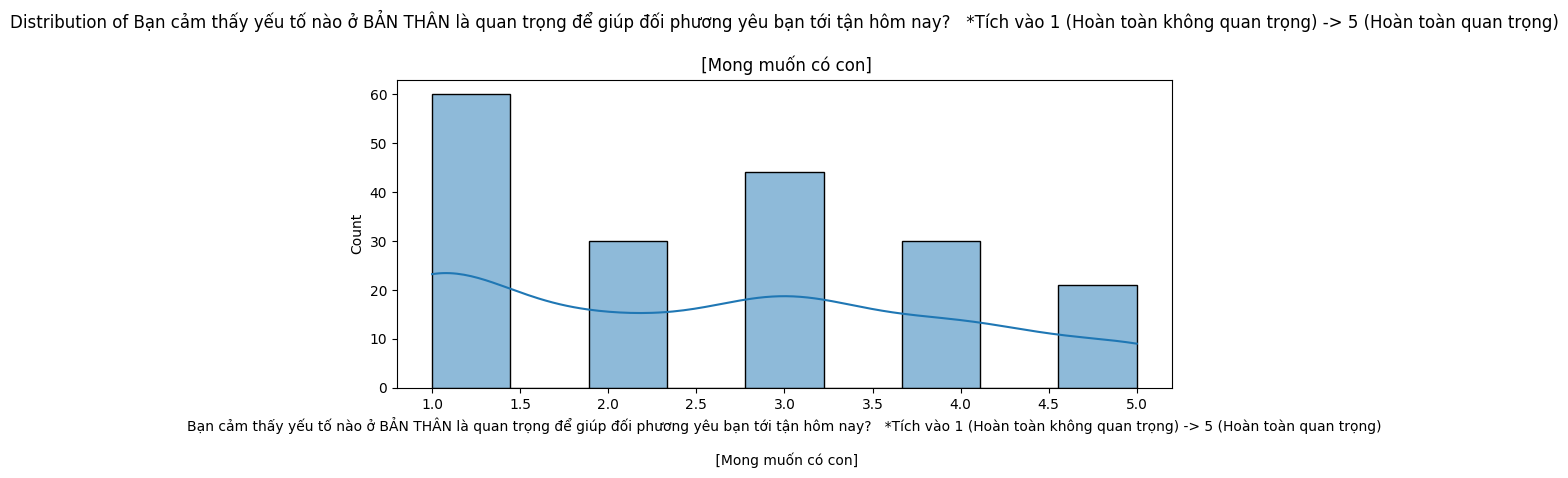

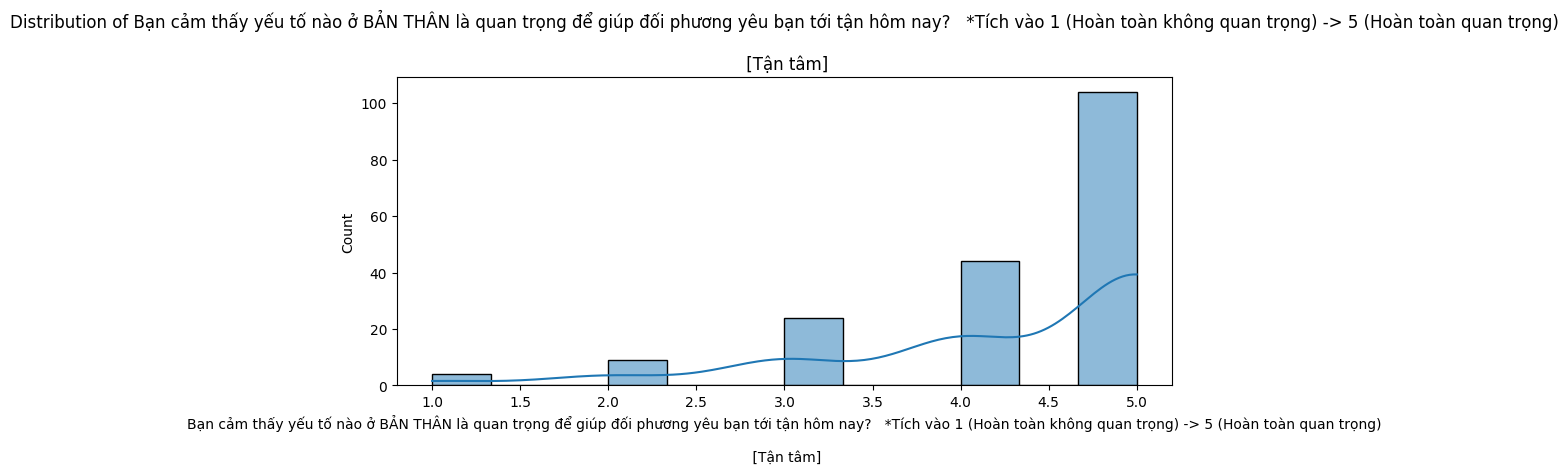

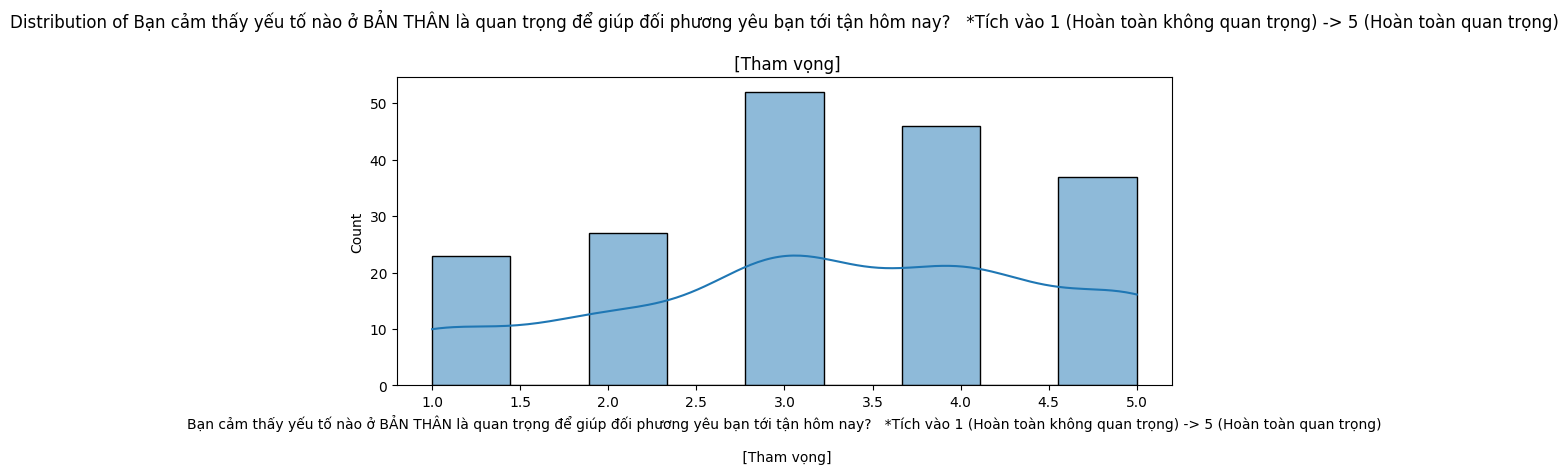

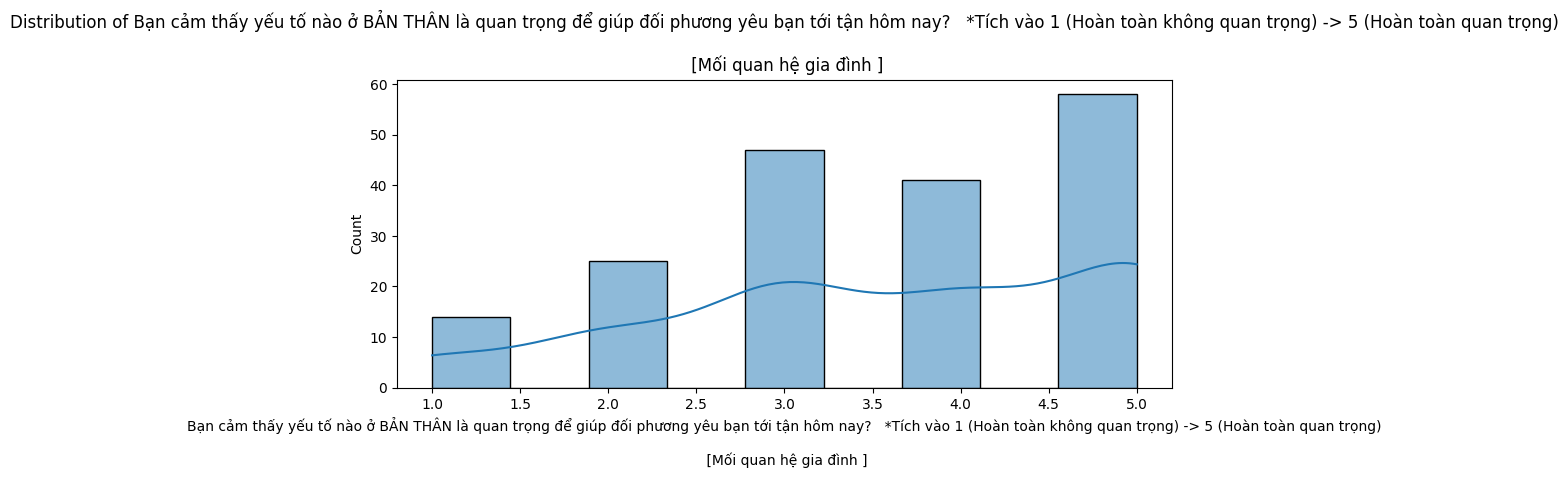

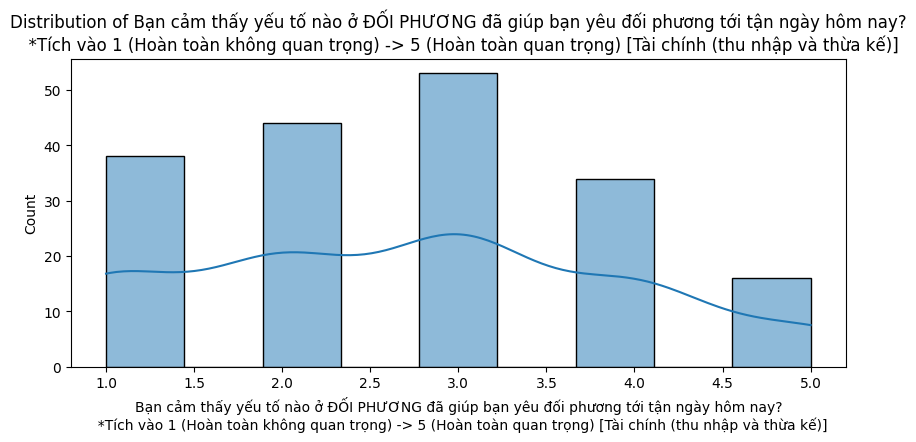

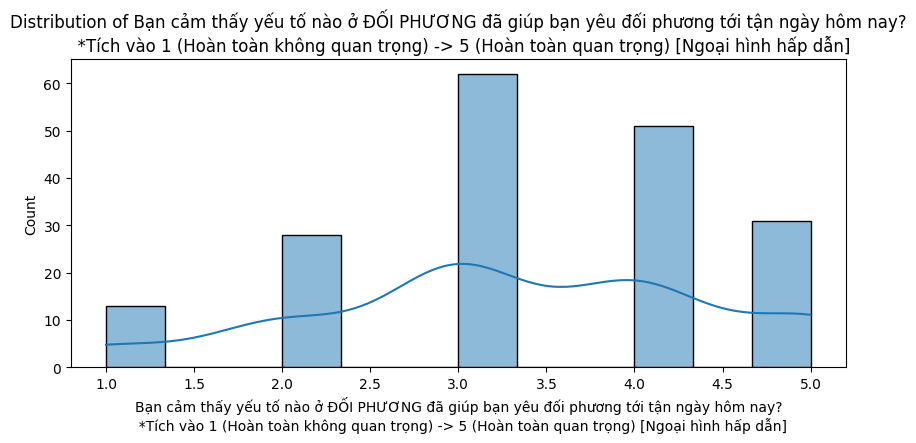

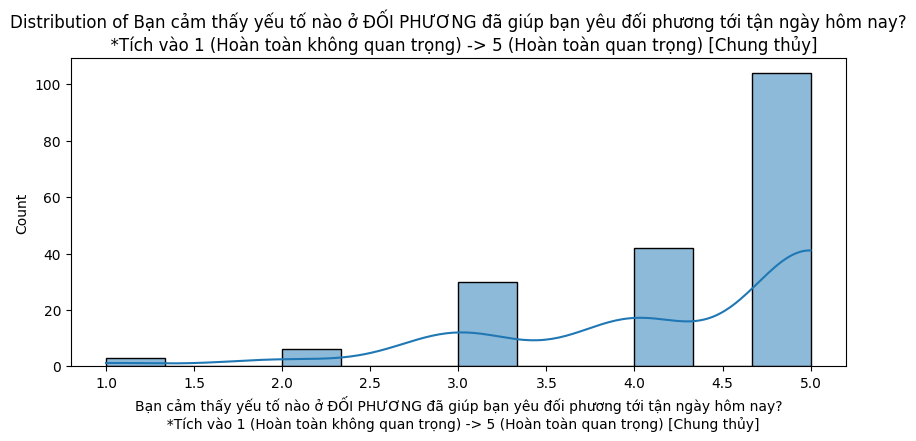

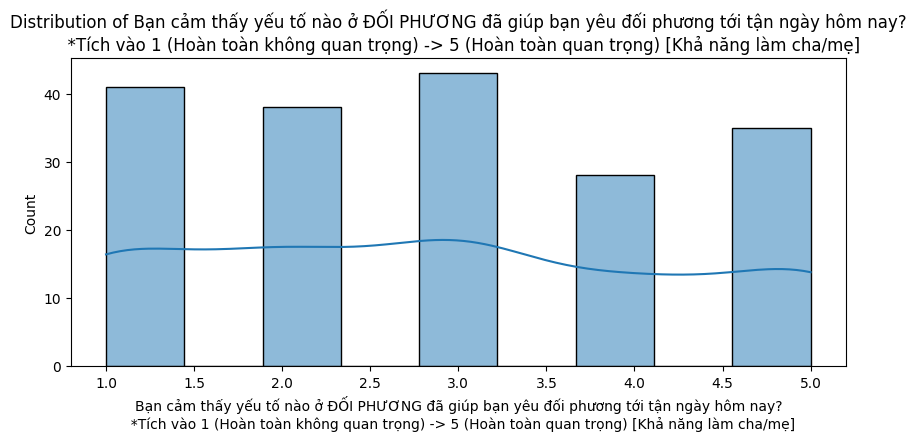

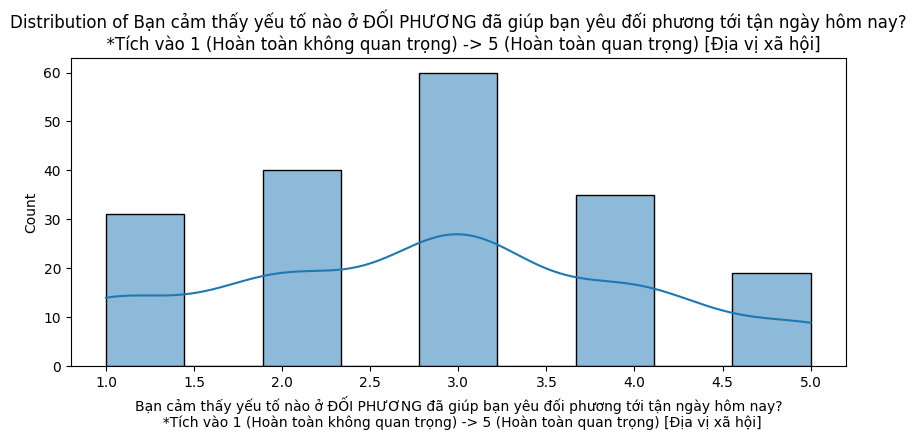

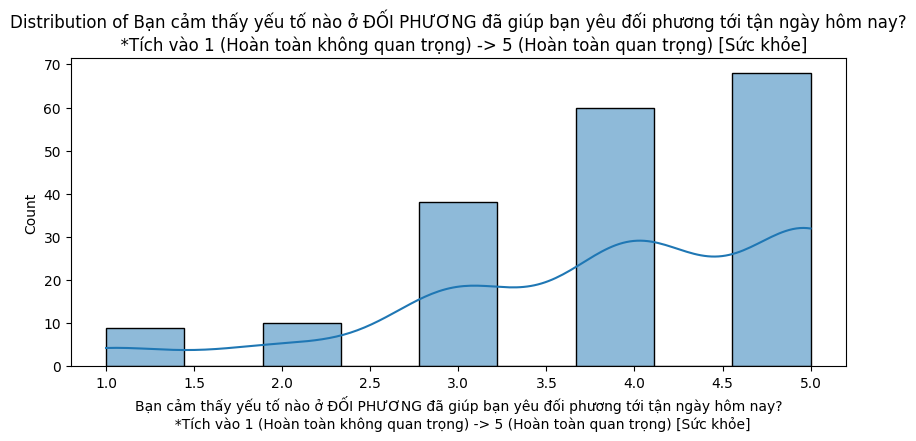

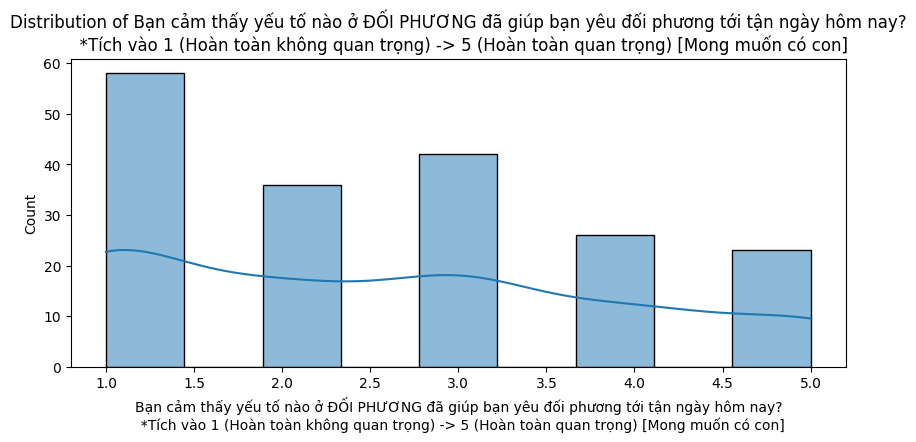

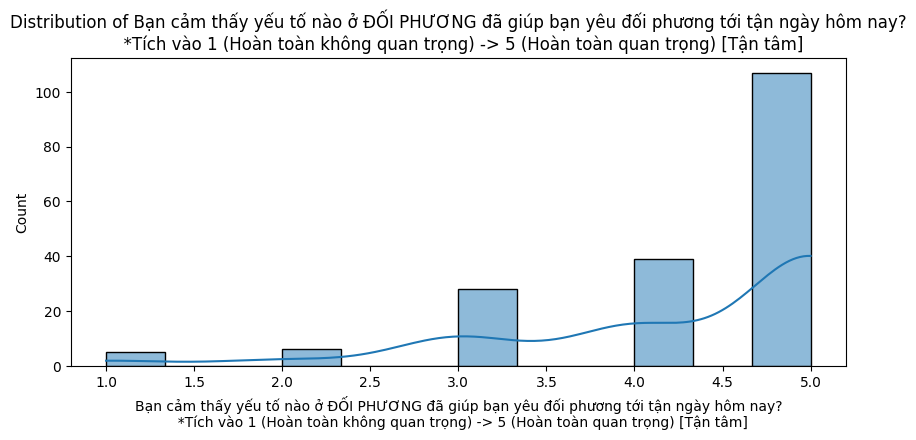

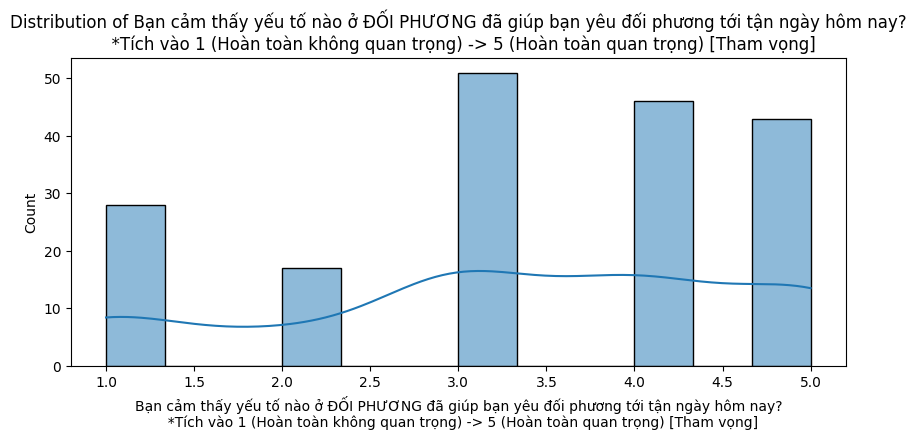

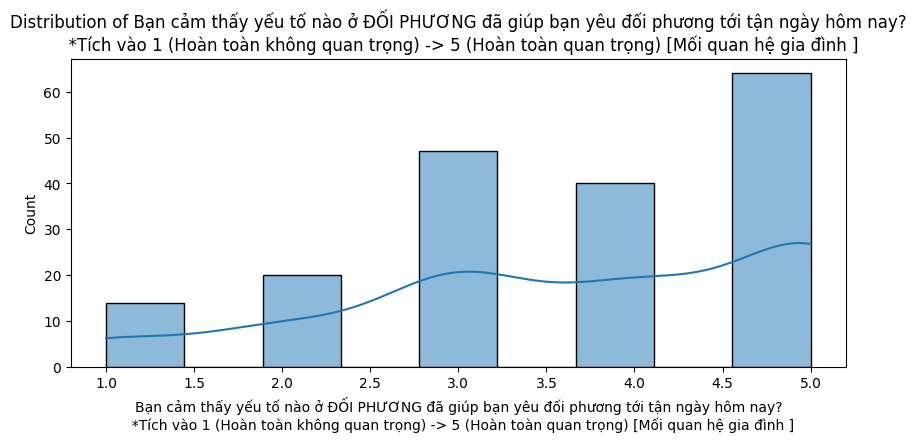

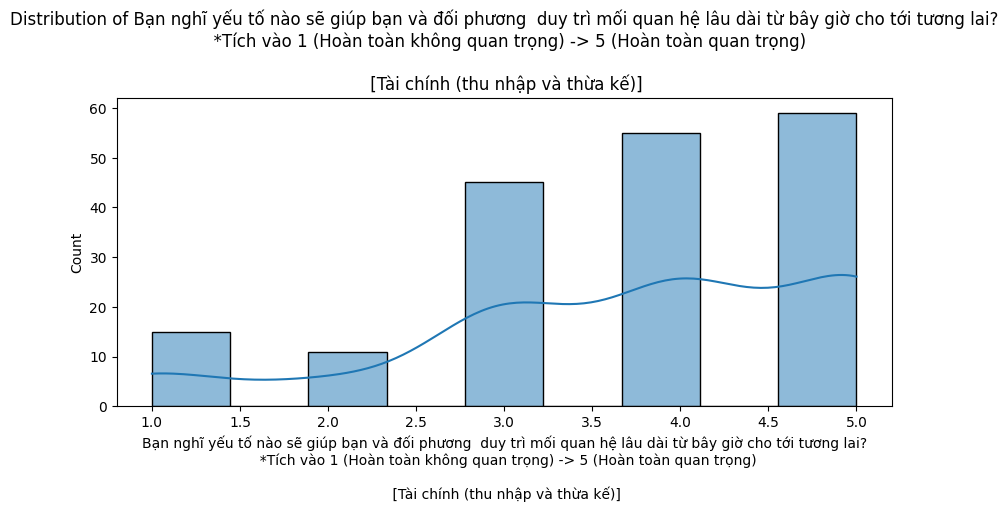

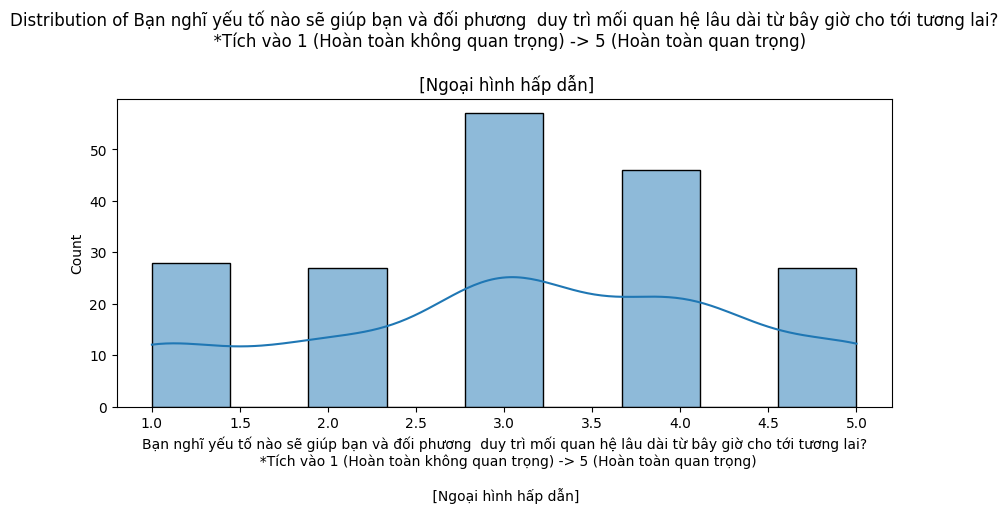

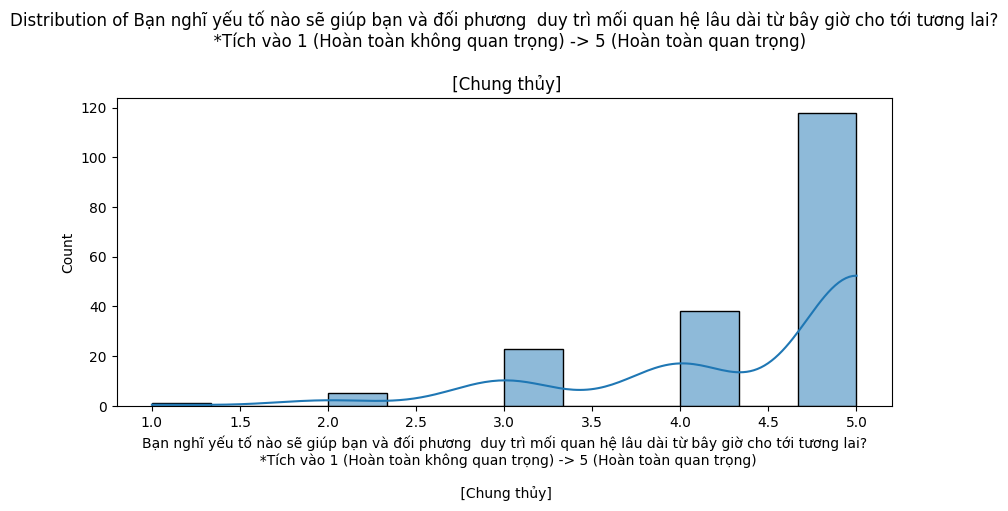

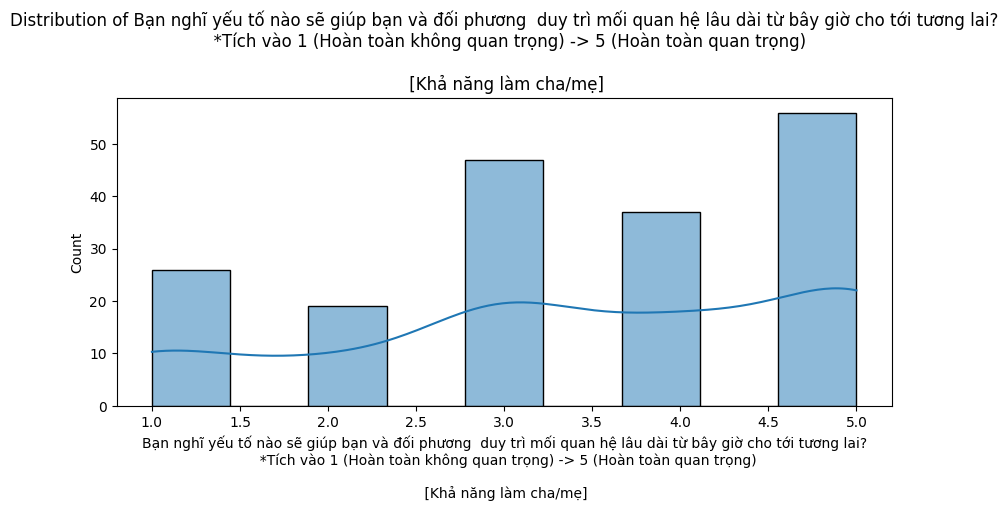

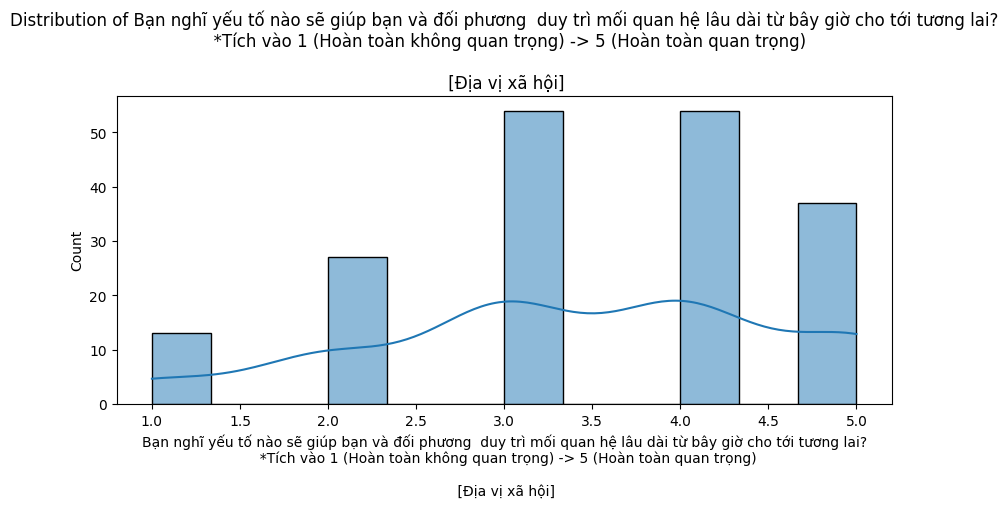

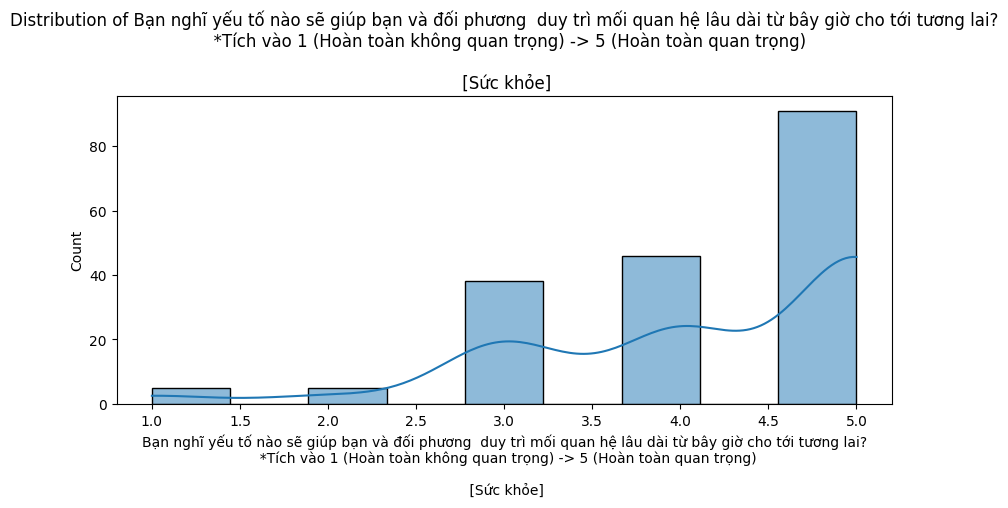

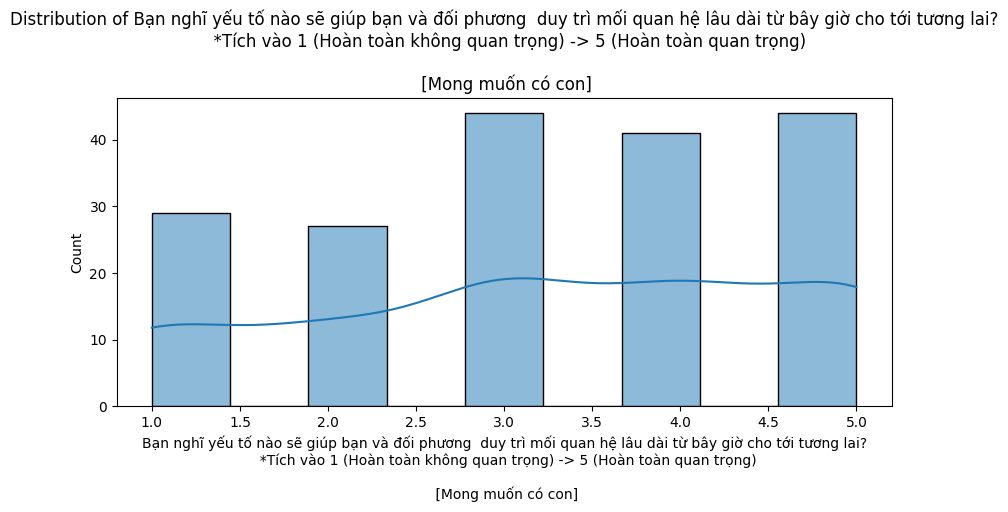

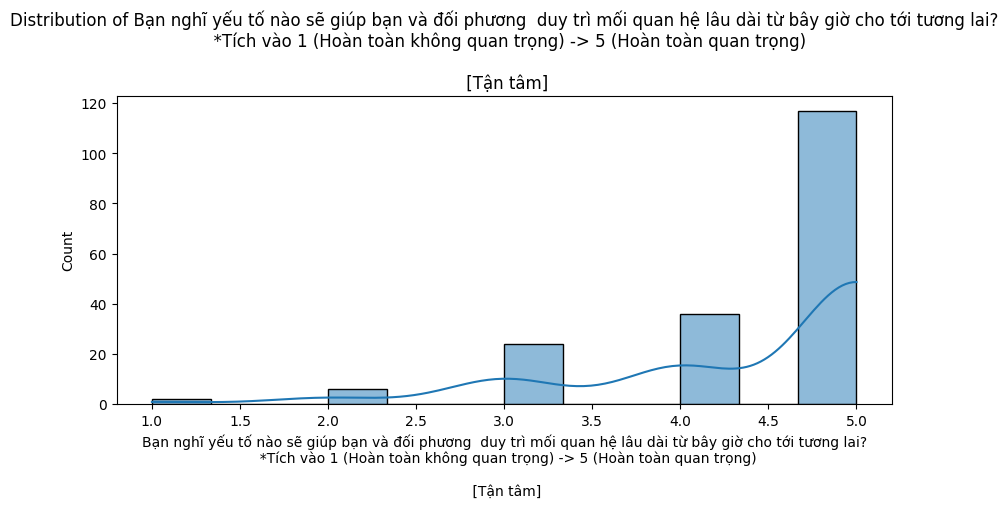

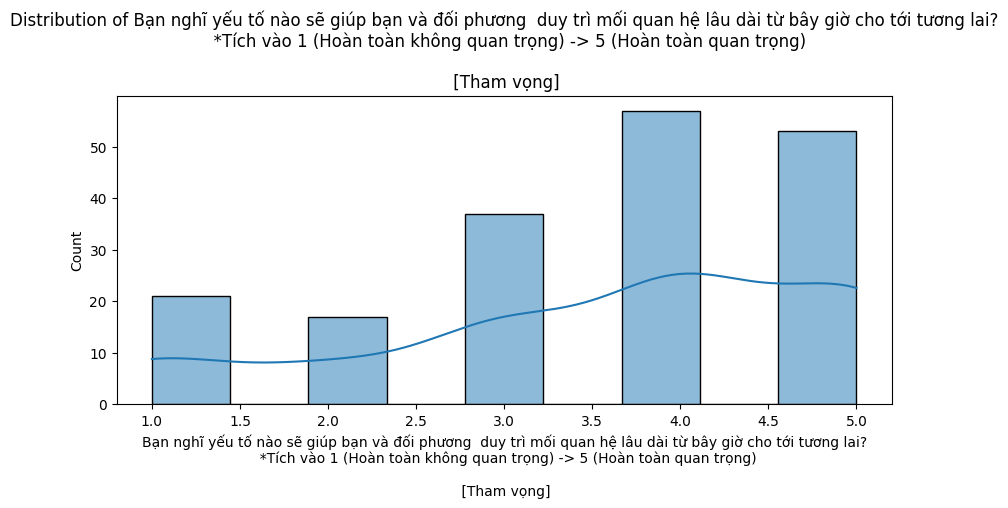

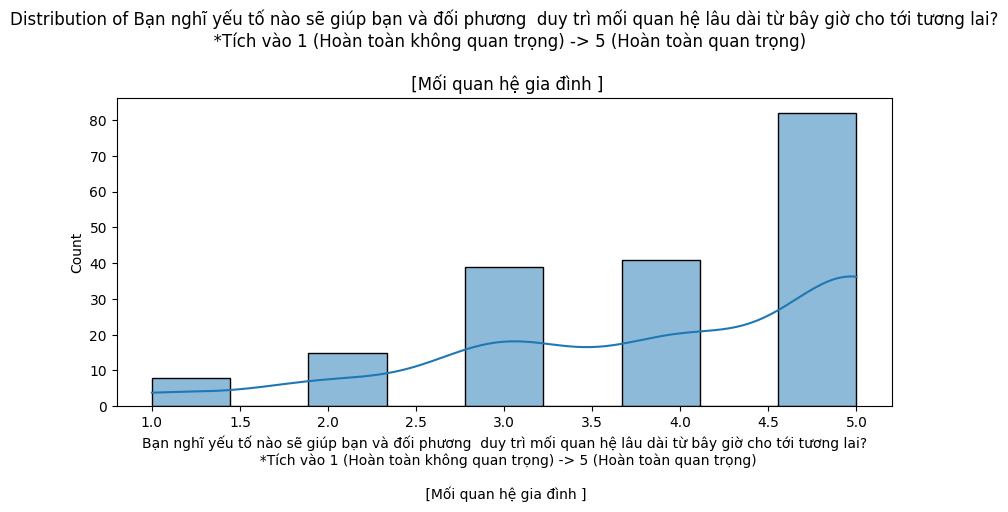

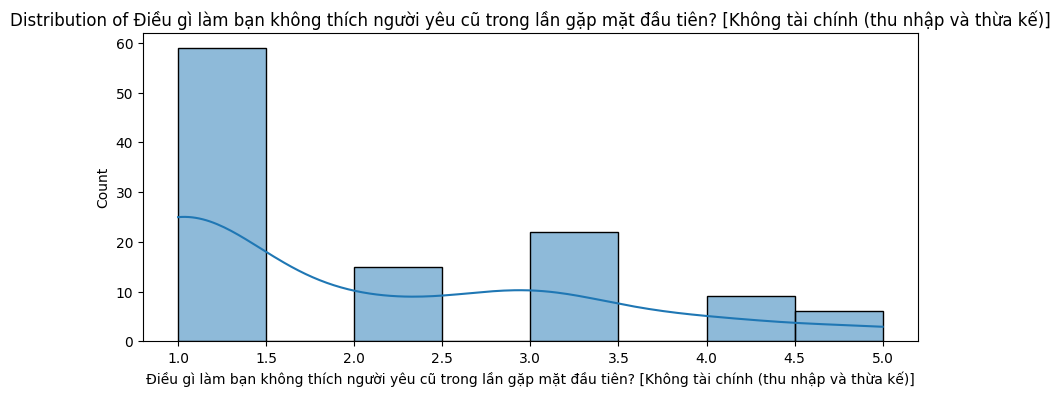

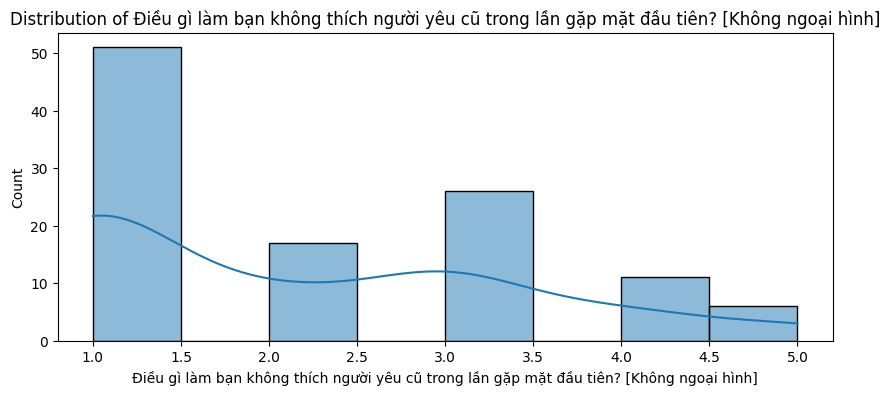

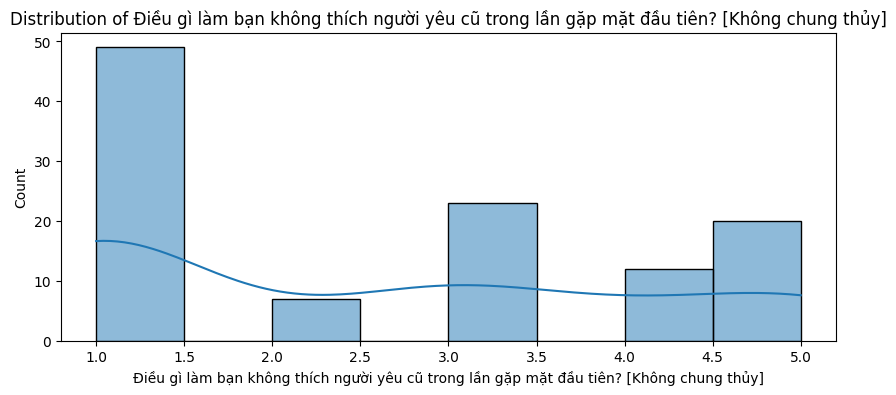

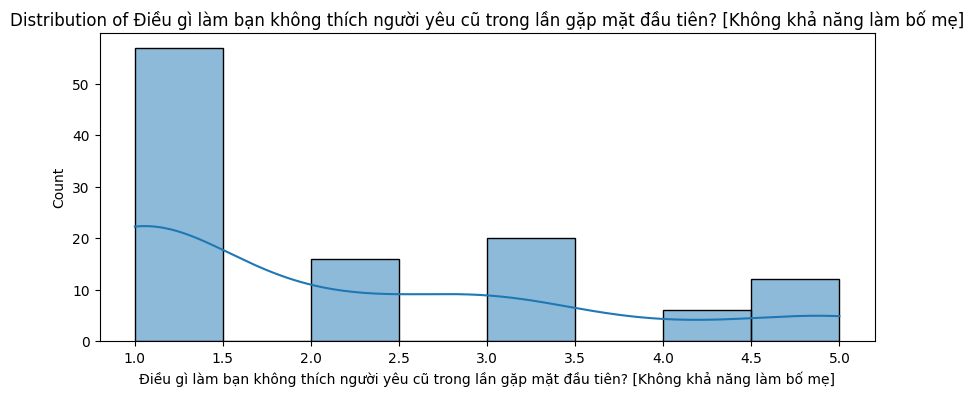

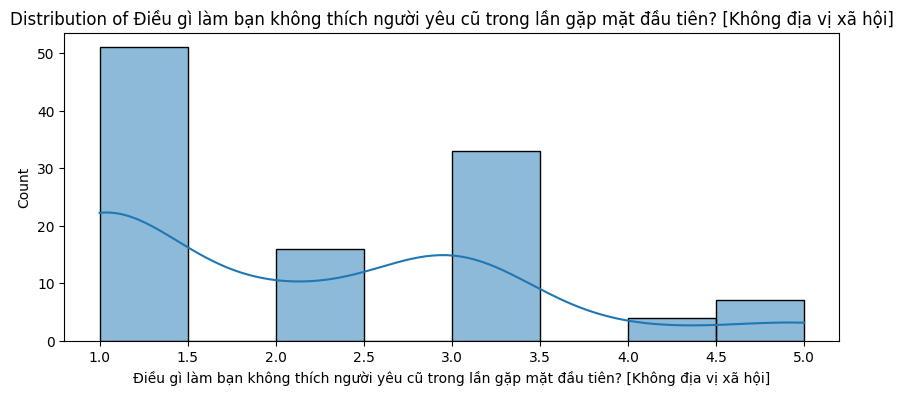

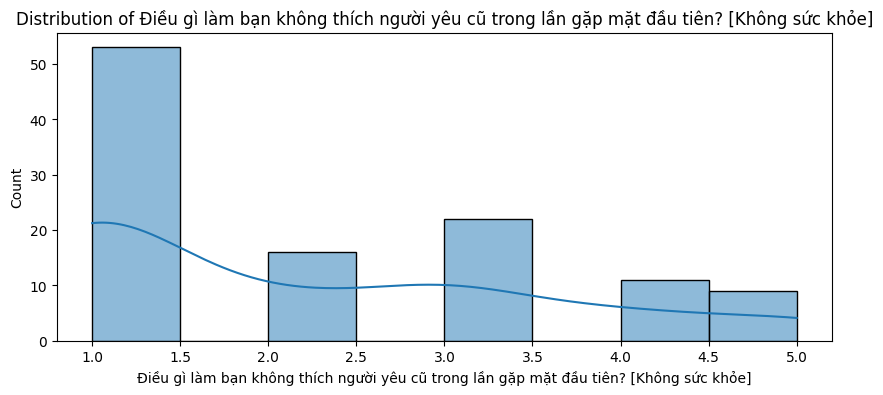

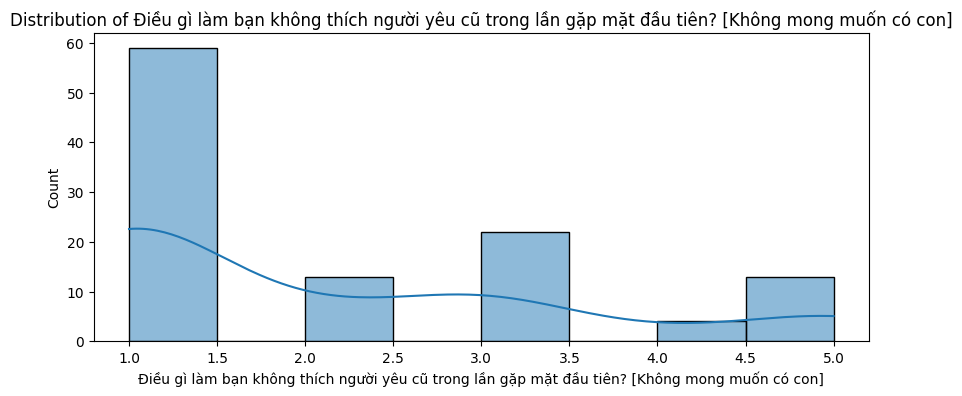

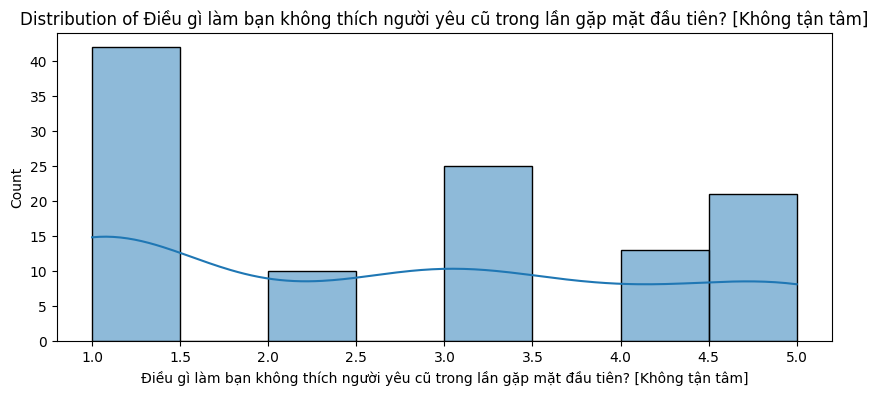

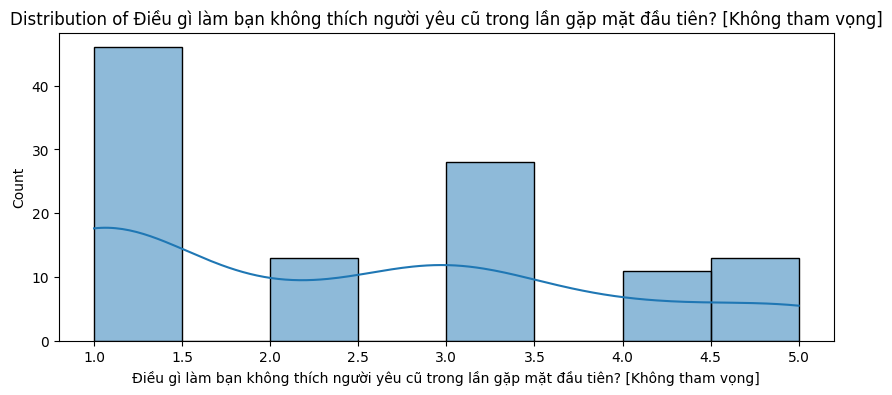

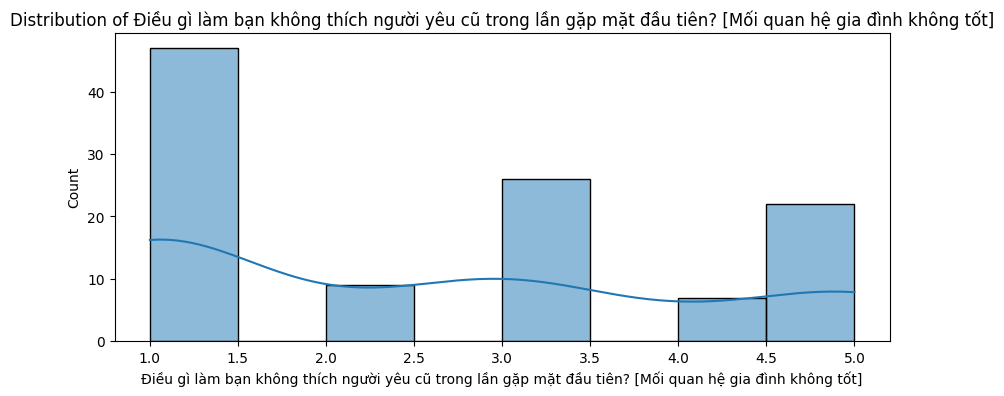

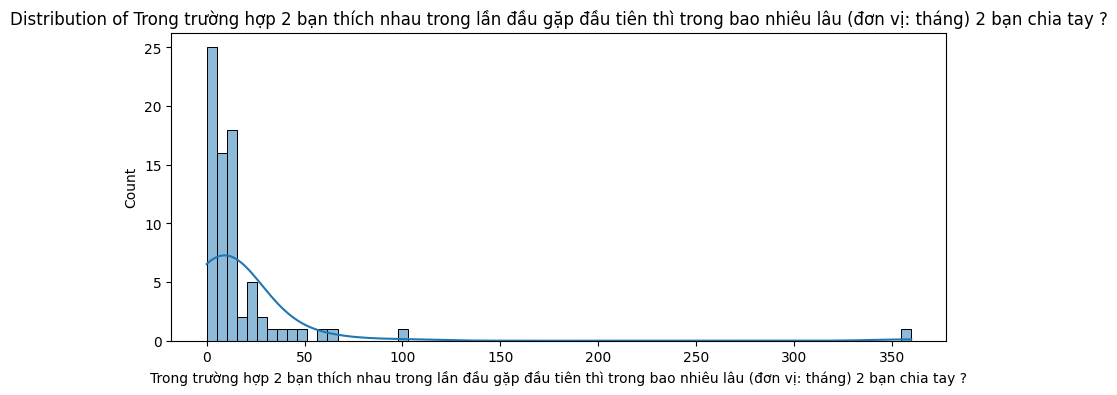

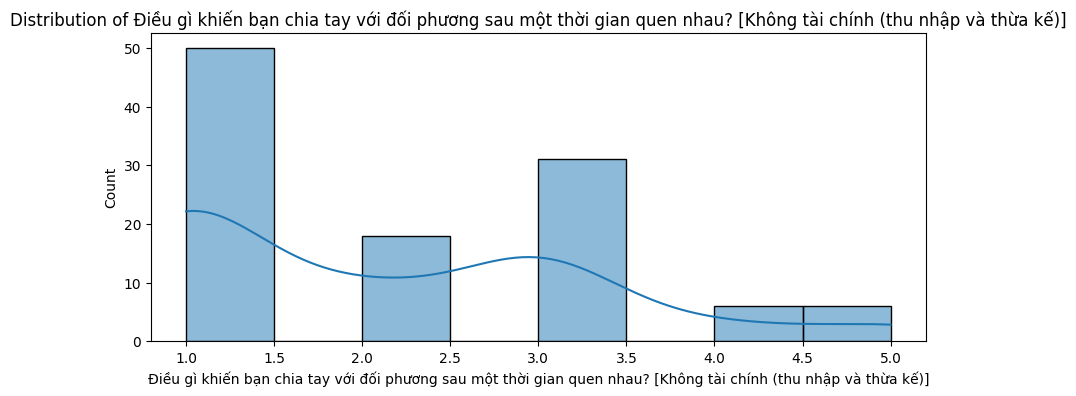

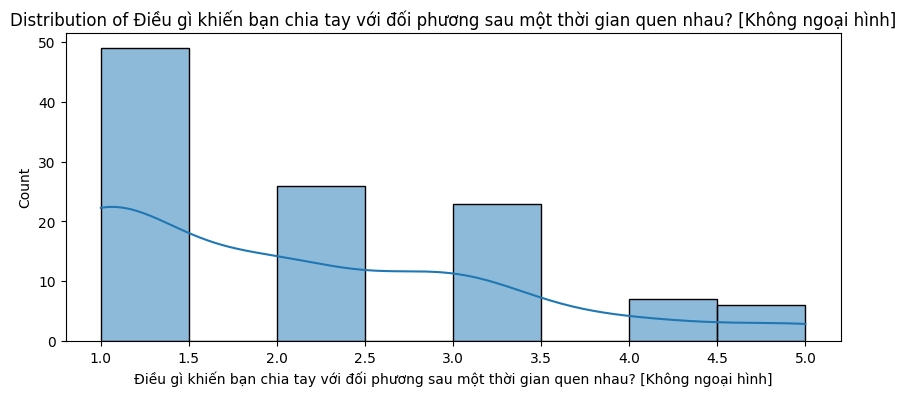

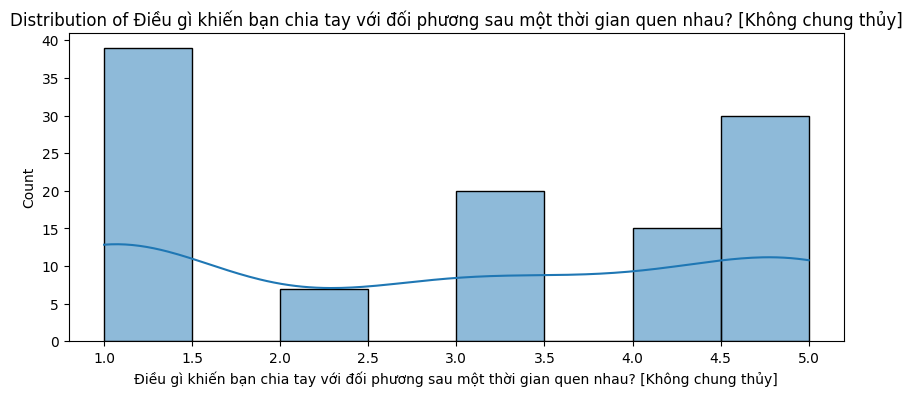

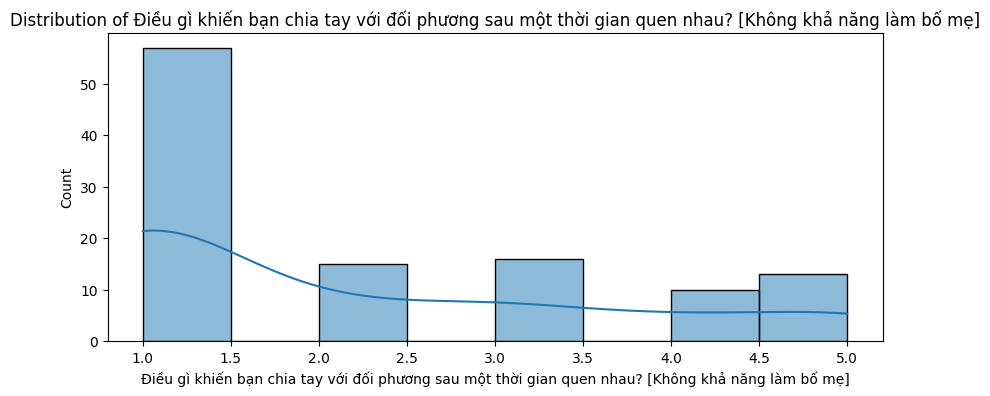

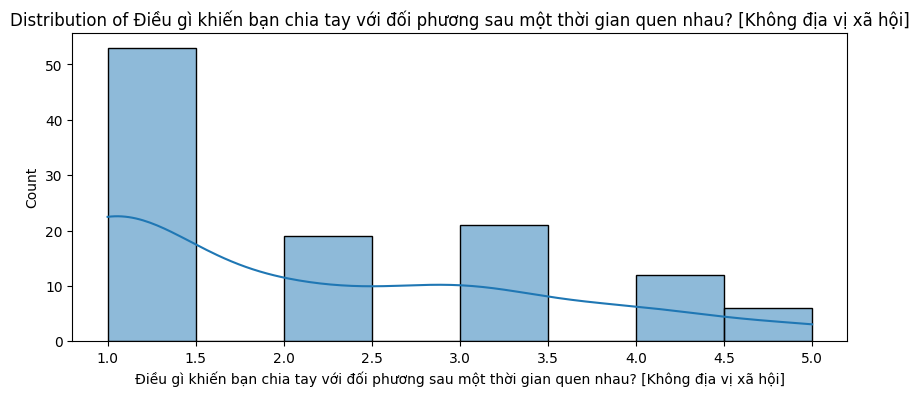

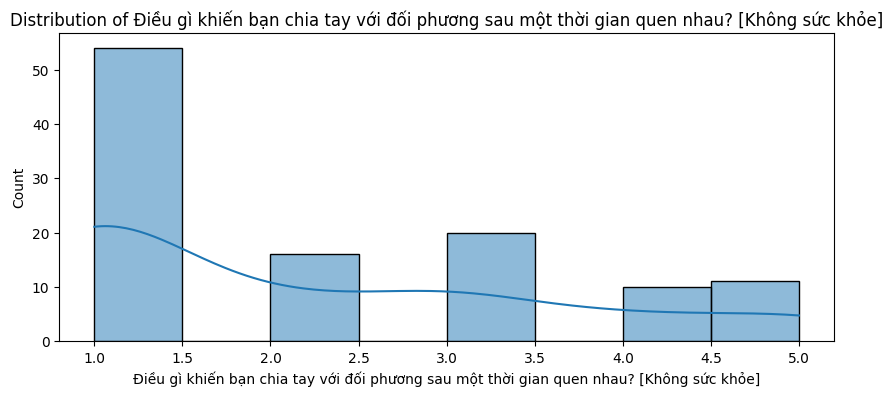

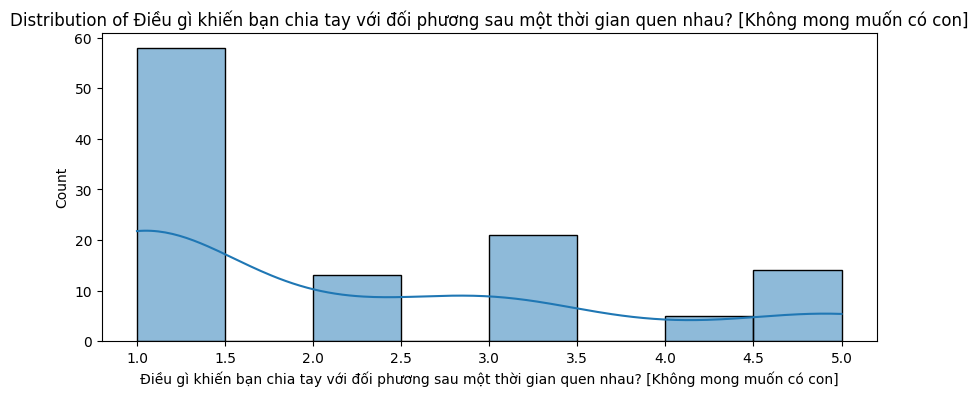

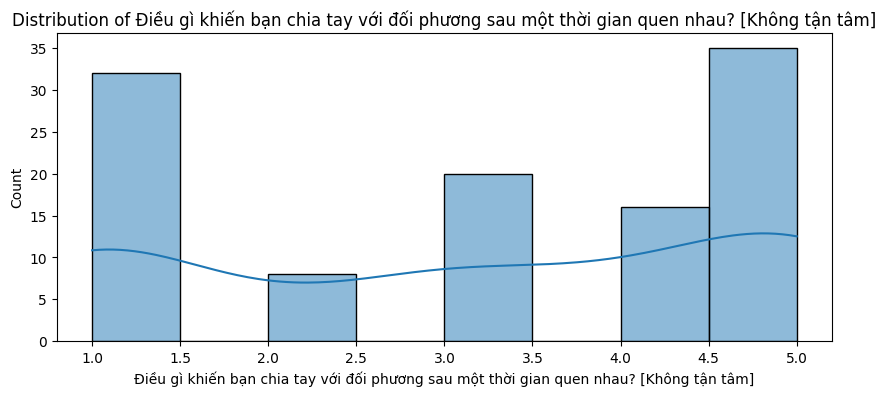

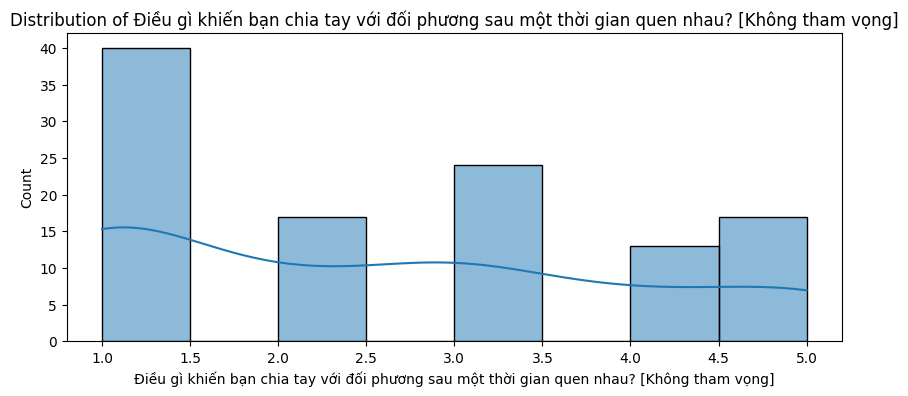

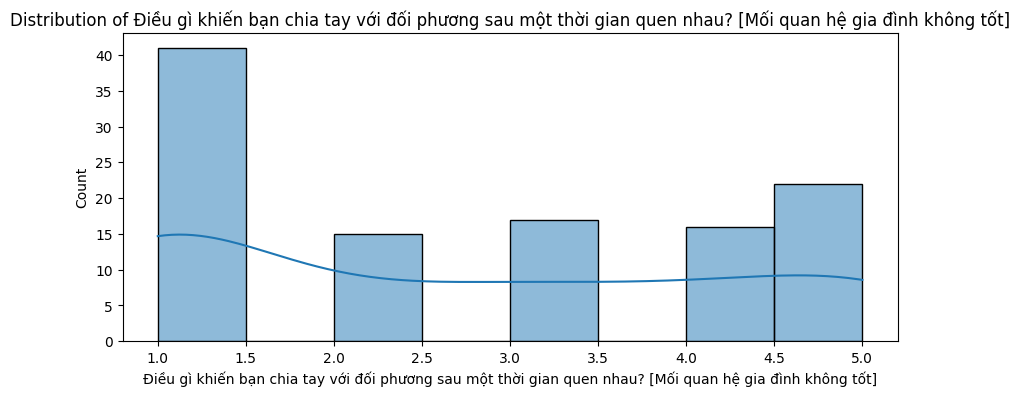

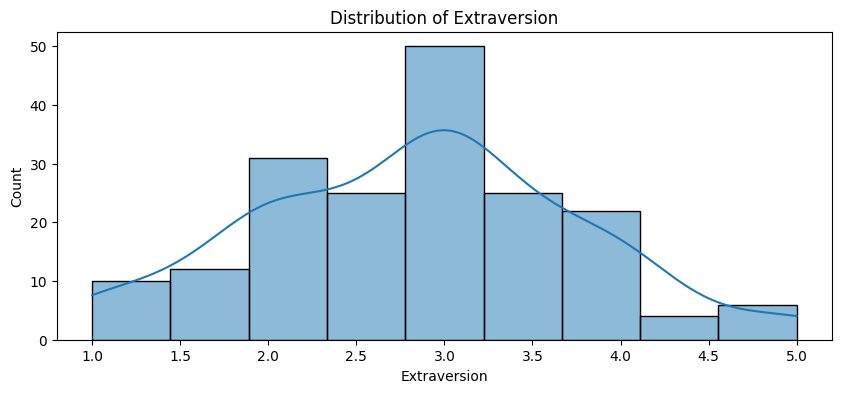

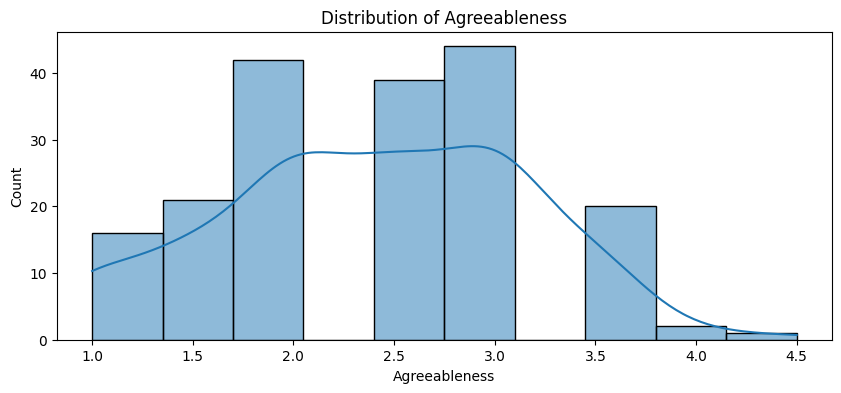

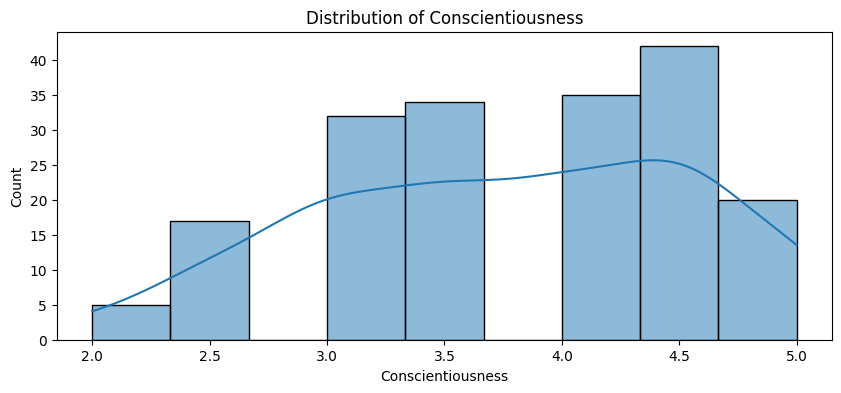

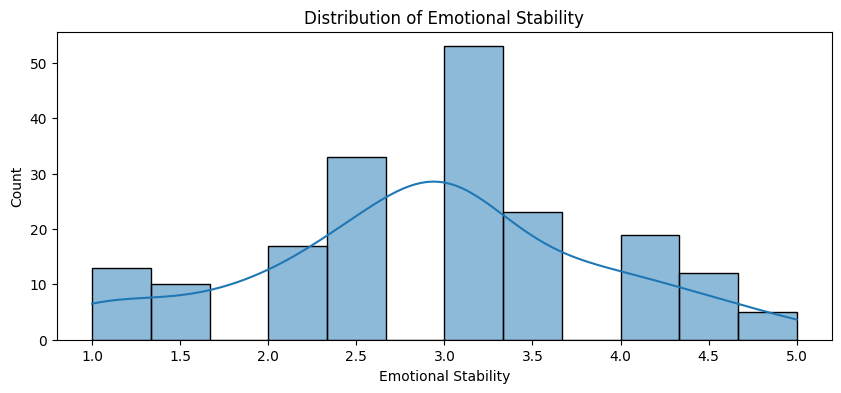

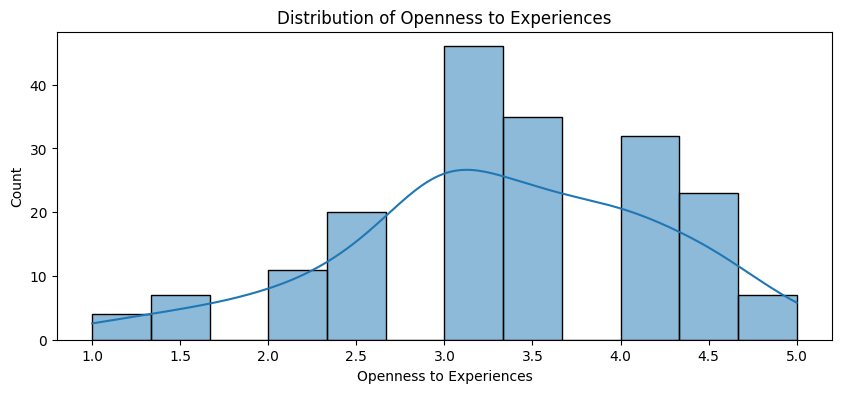

In [ ]:
# Plotting histograms and density plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [ ]:
duration_relationship_column='Hai bạn quen nhau được bao lâu rồi? (Đơn vị tính: tháng)'
data[duration_relationship_column] = pd.to_numeric(data[duration_relationship_column], errors='coerce')


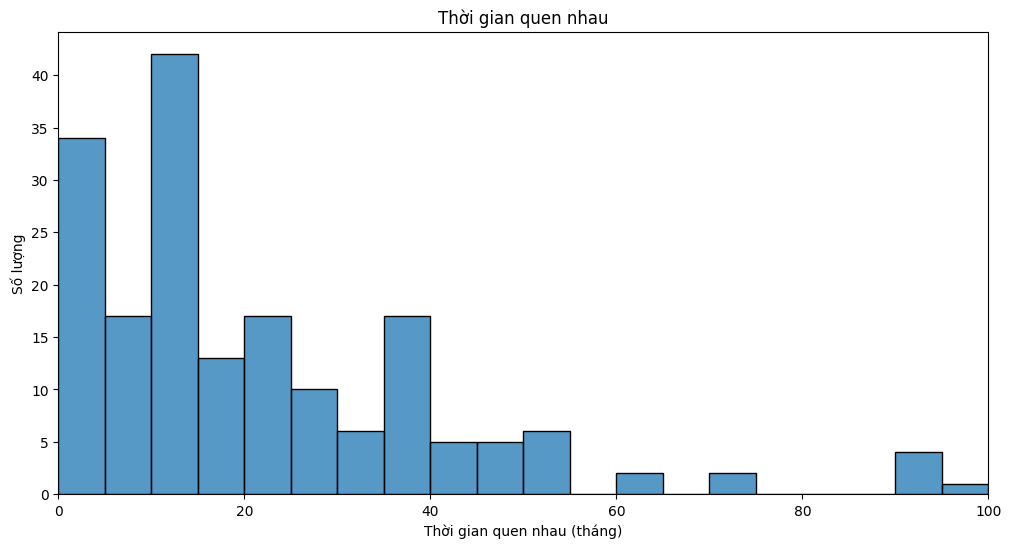

In [4]:
duration_relationship_column = 'Hai bạn quen nhau được bao lâu rồi? (Đơn vị tính: tháng)'

# Bins for the histogram
bins = list(range(0, 101, 5))
# Cleaning the data by converting to numeric and handling non-numeric values
data[duration_relationship_column] = pd.to_numeric(data[duration_relationship_column], errors='coerce').dropna()

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data[duration_relationship_column].dropna(), bins=bins)
plt.title('Thời gian quen nhau')
plt.xlabel('Thời gian quen nhau (tháng)')
plt.ylabel('Số lượng')
plt.xlim(0, 100)  # Setting x-axis limit to 100
plt.show()

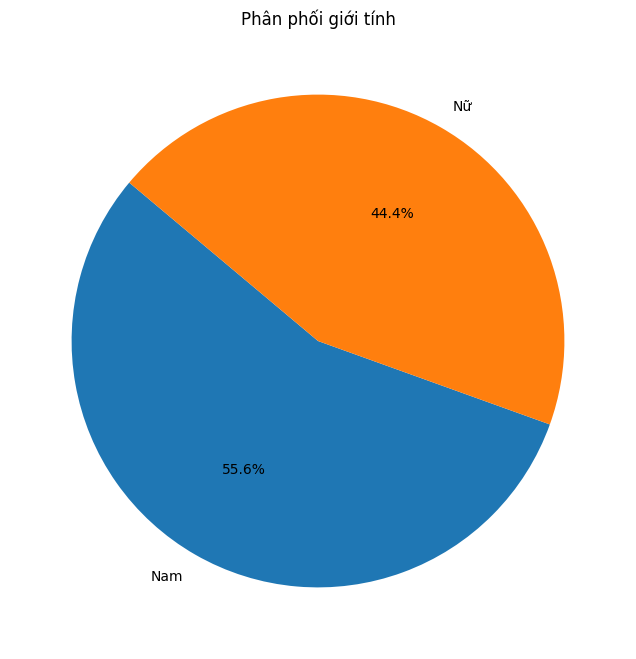

In [ ]:
# Tìm cột có chứa thông tin về giới tính
gender_column ='Giới tính của bạn:'
if gender_column:
    # Tính số lượng cho mỗi giới tính
    gender_counts = data[gender_column].value_counts()

    # Vẽ biểu đồ hình bánh (pie chart) cho phân phối giới tính
    plt.figure(figsize=(8, 8))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Phân phối giới tính')
    plt.show()


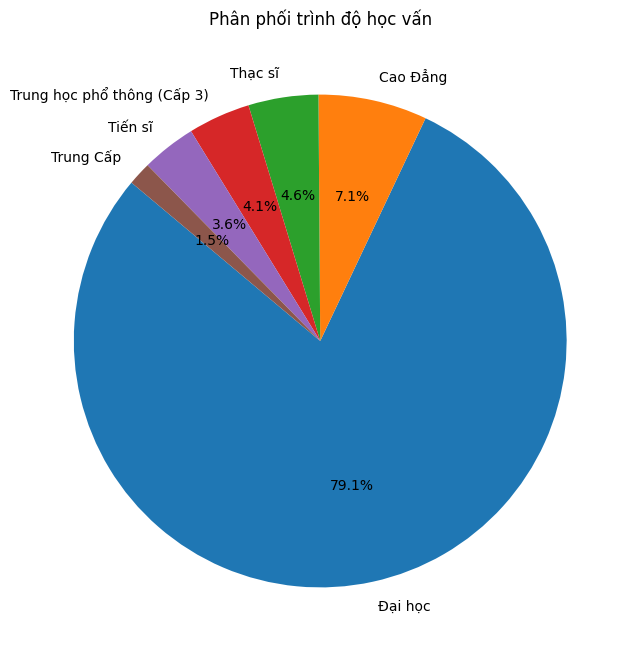

In [ ]:
# Tìm cột có chứa thông tin về trình độ học vấn
education_column = 'Trình độ học vấn cao nhất của bạn? '

if education_column:
    # Tính số lượng cho mỗi trình độ học vấn
    education_counts = data[education_column].value_counts()

    # Vẽ biểu đồ hình bánh (pie chart) cho phân phối trình độ học vấn
    plt.figure(figsize=(10, 8))
    plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Phân phối trình độ học vấn')
    plt.show()


In [ ]:
data.columns

Index(['Unnamed: 0', 'Timestamp',
       'Tên đại diện cho cặp đôi của bạn (Bạn và đối phương sẽ thống nhất 1 biệt danh đại diện cho cặp đôi của mình)',
       'Ngày tháng năm sinh của bạn:', 'Giới tính của bạn:',
       'Trình độ học vấn cao nhất của bạn? ',
       'Thu nhập hàng tháng của bạn là bao nhiêu?\n(đơn vị :VNĐ)',
       'Hai bạn quen nhau được bao lâu rồi? (Đơn vị tính: tháng)',
       'Đặc điểm chung của gia đình hai bên\n',
       'Self(first) - Tài chính (thu nhập và thừa kế)',
       'Self(first) - Ngoại hình hấp dẫn', 'Self(first) - Chung thủy',
       'Self(first) - Khả năng làm cha/mẹ', 'Self(first) - Địa vị xã hội',
       'Self(first) - Sức khỏe', 'Self(first) - Mong muốn có con',
       'Self(first) - Tận tâm', 'Self(first) - Tham vọng',
       'Self(first) - Mối quan hệ gia đình',
       'Partner(first) - Tài chính (thu nhập và thừa kế)',
       'Partner(first) - Ngoại hình hấp dẫn', 'Partner(first) - Chung thủy',
       'Partner(first) - Khả năng làm cha/mẹ',
  

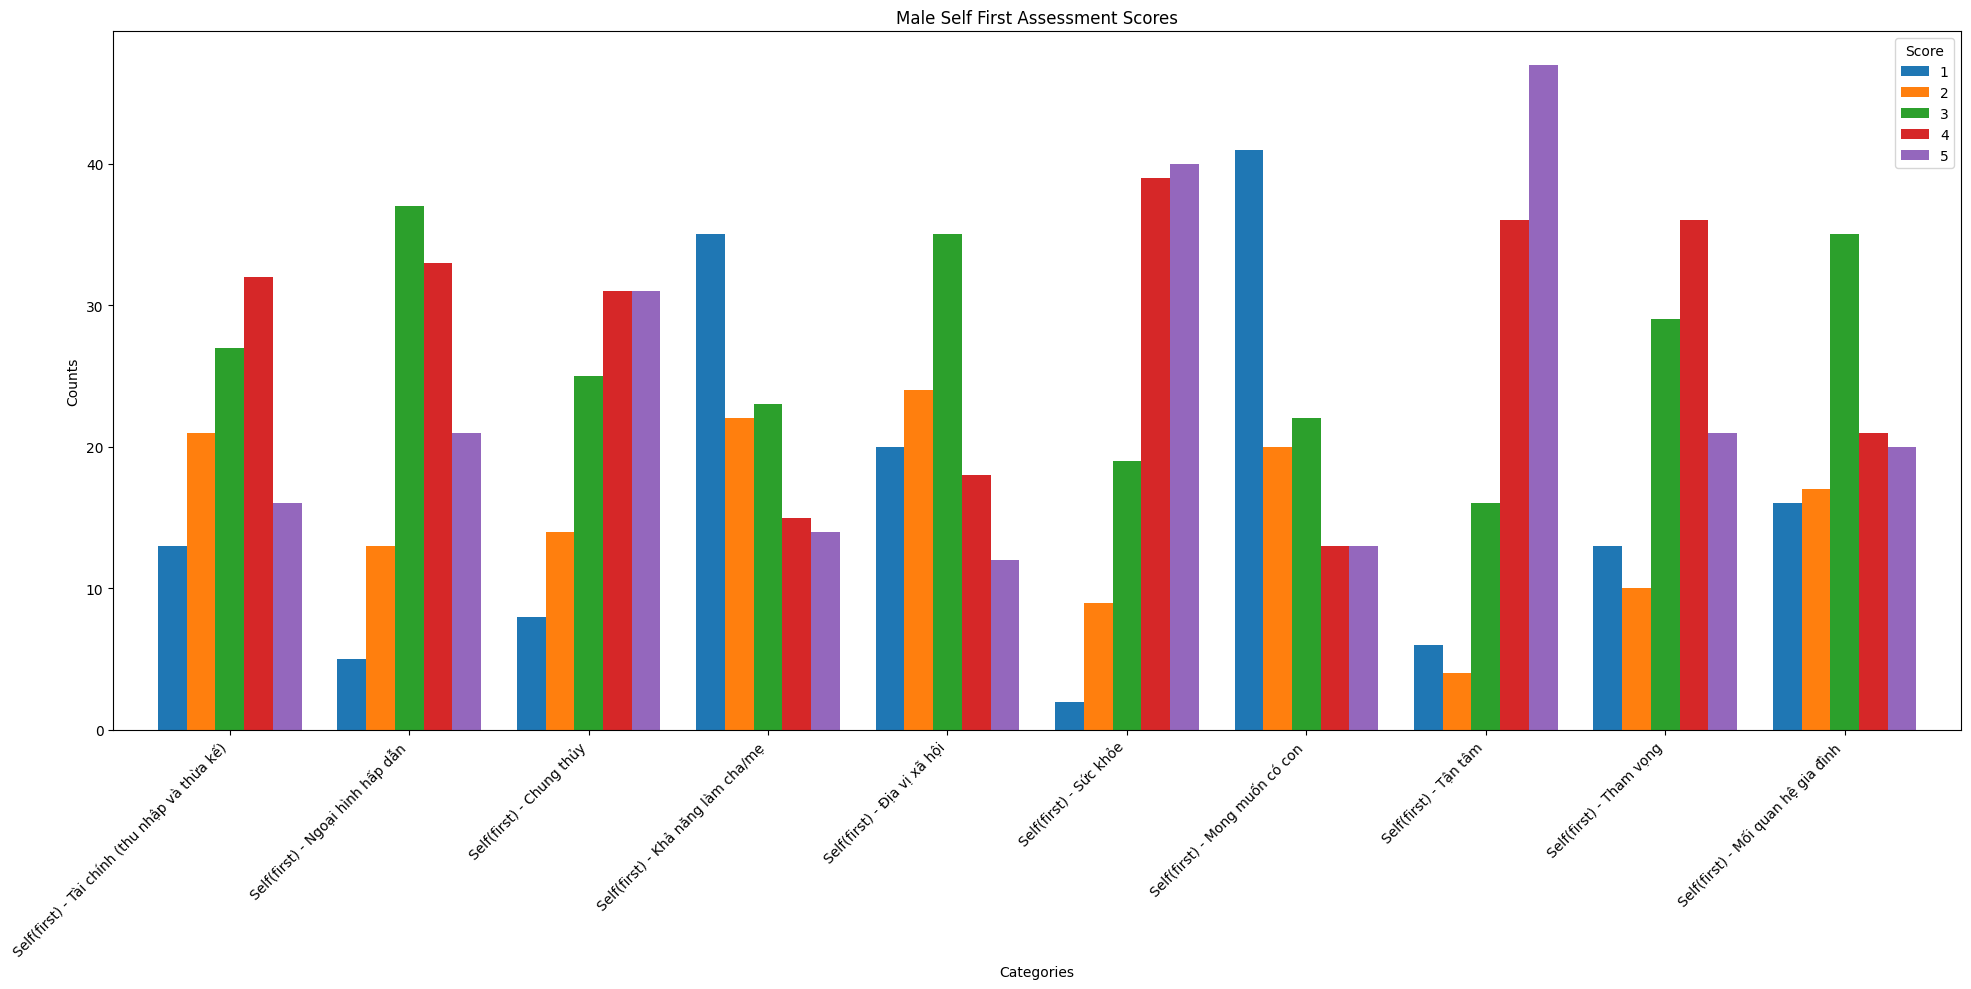

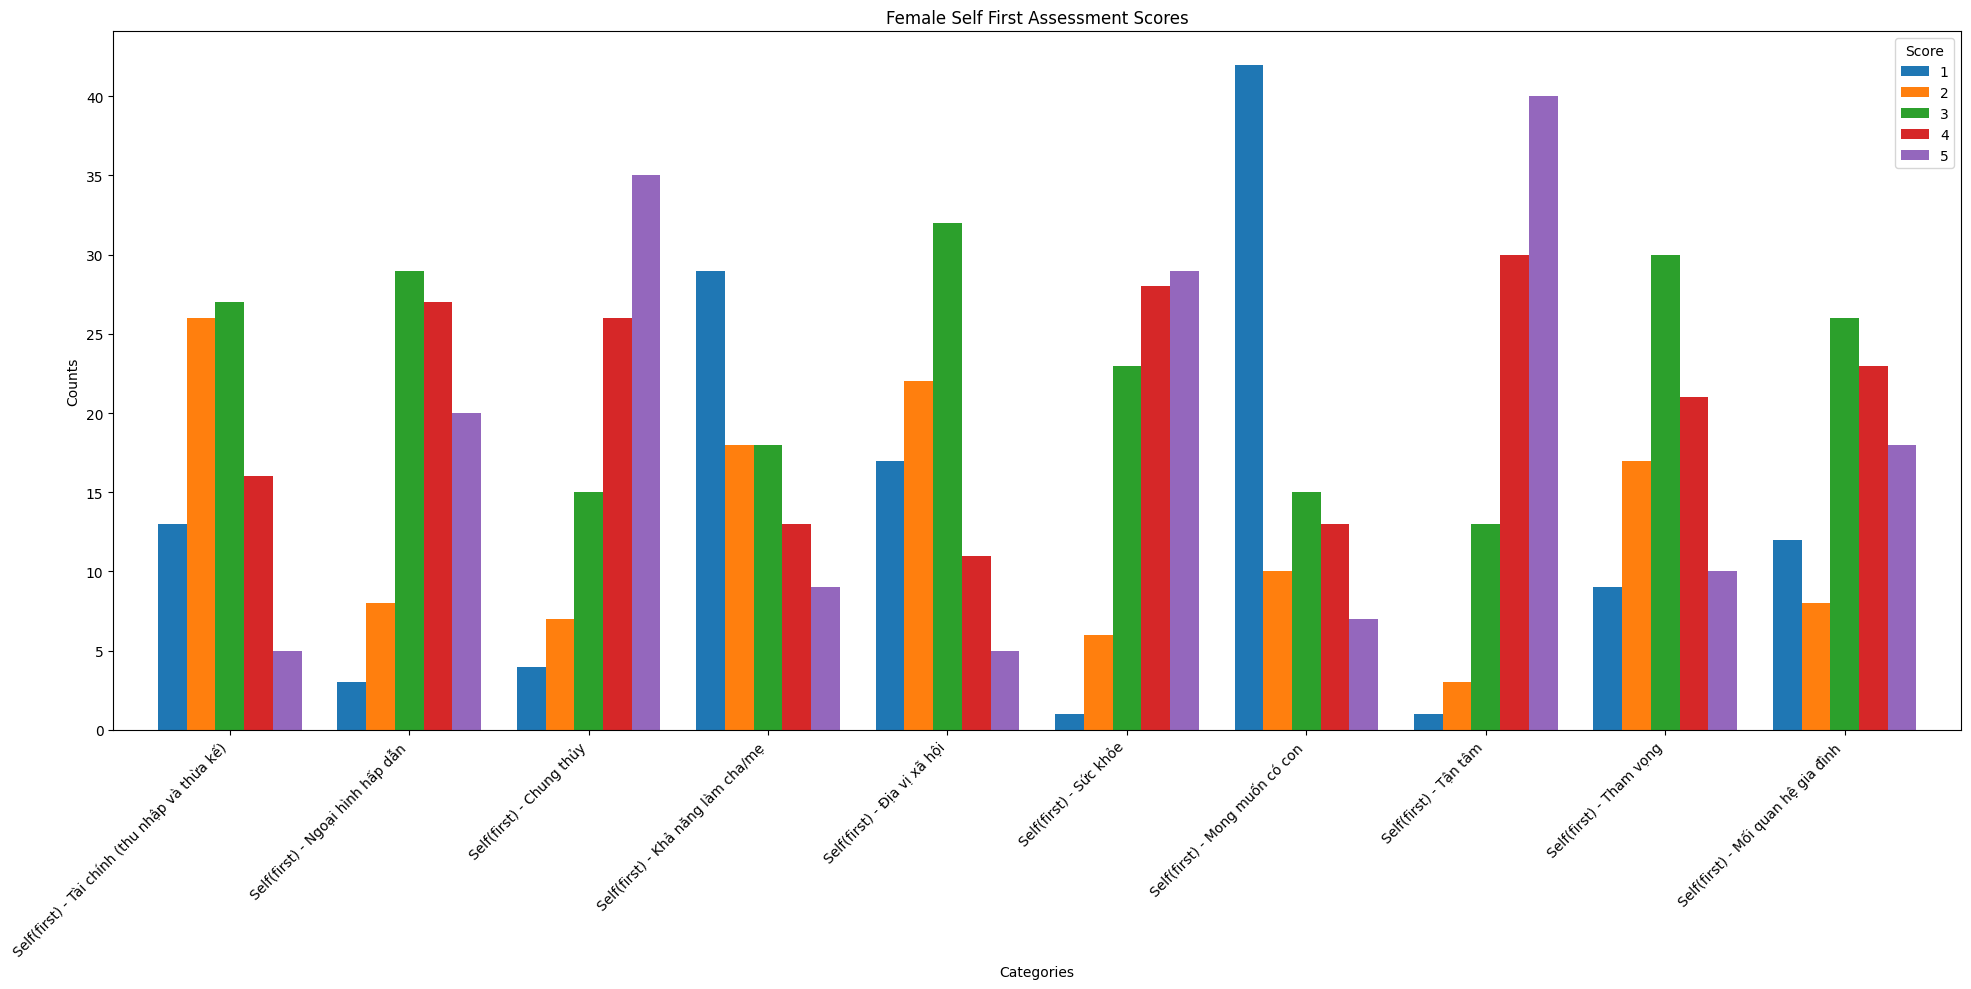

In [ ]:
columns_self_assessment=['Self(first) - Tài chính (thu nhập và thừa kế)',
       'Self(first) - Ngoại hình hấp dẫn', 'Self(first) - Chung thủy',
       'Self(first) - Khả năng làm cha/mẹ', 'Self(first) - Địa vị xã hội',
       'Self(first) - Sức khỏe', 'Self(first) - Mong muốn có con',
       'Self(first) - Tận tâm', 'Self(first) - Tham vọng',
       'Self(first) - Mối quan hệ gia đình',]

# Separate the data by gender
data_male = data[data['Giới tính của bạn:'] == 'Nam']
data_female = data[data['Giới tính của bạn:'] == 'Nữ']

# Function to create a histogram-like bar chart for self-assessment scores for a given gender
def plot_self_assessment_histogram(gender_data, gender_label, columns_self_assessment):
    # Calculate counts for each score within each self-assessment category
    score_counts = {score: [] for score in range(1, 6)}
    for column in columns_self_assessment:
        counts = gender_data[column].value_counts().reindex(range(1, 6), fill_value=0)
        for score in range(1, 6):
            score_counts[score].append(counts[score])

    # Convert the score counts to a DataFrame for easier plotting
    df_counts = pd.DataFrame(score_counts)

    # Plot
    ax = df_counts.plot(kind='bar', figsize=(20, 10), width=0.8)

    # Customize the plot
    ax.set_title(f'{gender_label} Self First Assessment Scores')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Counts')
    ax.set_xticklabels(columns_self_assessment, rotation=45, ha='right')
    plt.legend(title='Score')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function for male and female data
plot_self_assessment_histogram(data_male, 'Male', columns_self_assessment)
plot_self_assessment_histogram(data_female, 'Female', columns_self_assessment)

<ipython-input-6-b45a83635d08>:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  bar_positions = pd.np.arange(len(assessment_columns))


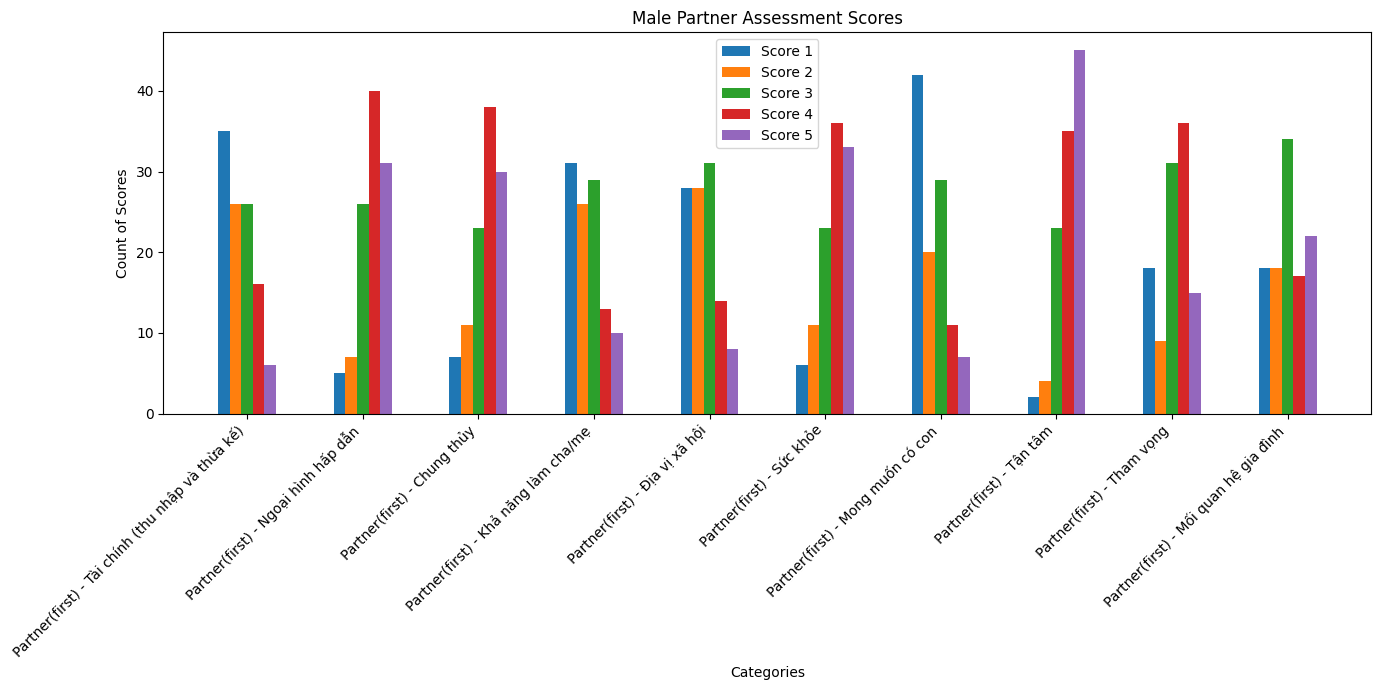

<ipython-input-6-b45a83635d08>:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  bar_positions = pd.np.arange(len(assessment_columns))


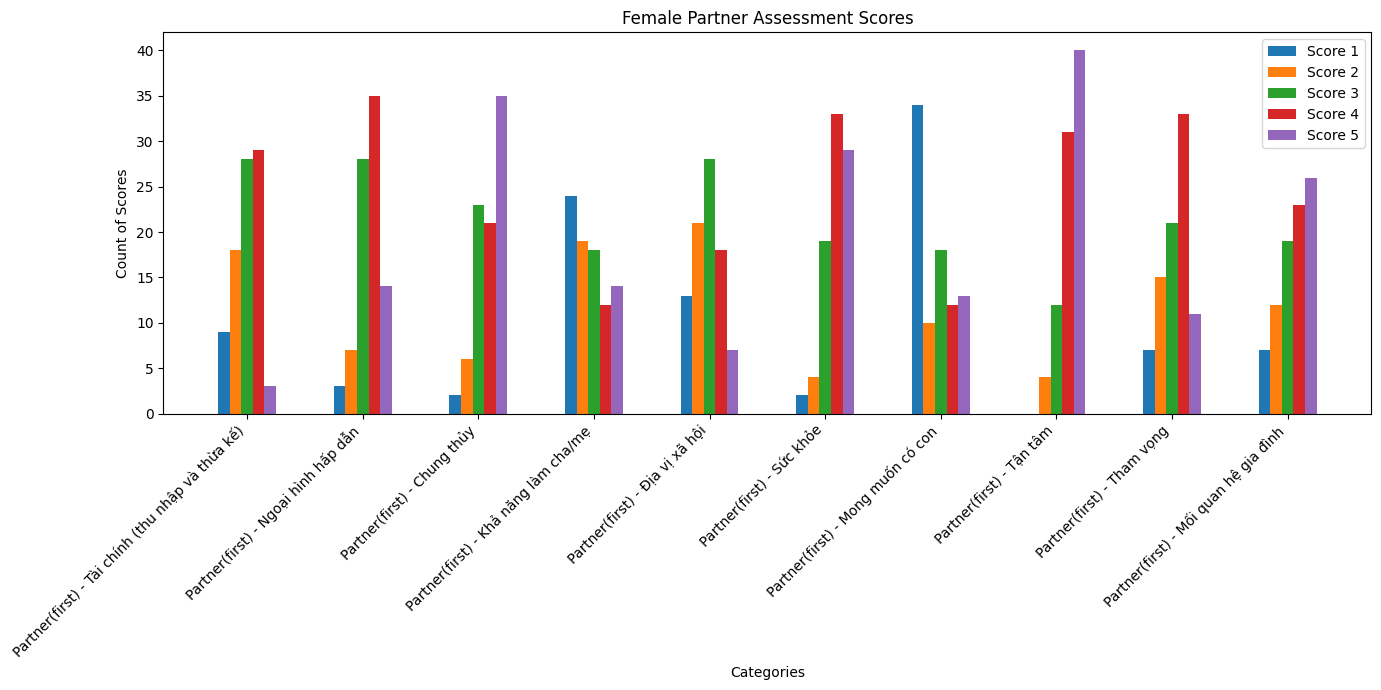

In [ ]:
# List of columns for partner(first) assessment
columns_partner_assessment = [
    'Partner(first) - Tài chính (thu nhập và thừa kế)',
    'Partner(first) - Ngoại hình hấp dẫn',
    'Partner(first) - Chung thủy',
    'Partner(first) - Khả năng làm cha/mẹ',
    'Partner(first) - Địa vị xã hội',
    'Partner(first) - Sức khỏe',
    'Partner(first) - Mong muốn có con',
    'Partner(first) - Tận tâm',
    'Partner(first) - Tham vọng',
    'Partner(first) - Mối quan hệ gia đình'
]

# Separate the data by gender
data_male = data[data['Giới tính của bạn:'] == 'Nam']
data_female = data[data['Giới tính của bạn:'] == 'Nữ']

# Function to create bar charts for partner(first) assessment scores
def plot_assessment_scores_by_gender(data, gender_label, assessment_columns):
    # Initialize a dictionary to store the count of each score for each category
    score_distribution = {score: [] for score in range(1, 6)}
    for column in assessment_columns:
        column_scores = data[column].value_counts().reindex(range(1, 6), fill_value=0)
        for score in range(1, 6):
            score_distribution[score].append(column_scores[score])

    # Transform the dictionary into a DataFrame for easier plotting
    df_scores = pd.DataFrame(score_distribution, index=assessment_columns)

    # Plotting
    bar_positions = pd.np.arange(len(assessment_columns))
    bar_width = 0.1  # Width of individual bars

    fig, ax = plt.subplots(figsize=(14, 7))

    for i in range(1, 6):
        ax.bar(bar_positions + (i-3)*bar_width, df_scores[i], width=bar_width, label=f'Score {i}')

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(assessment_columns, rotation=45, ha='right')
    ax.set_title(f'{gender_label} Partner Assessment Scores')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count of Scores')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot the assessment scores by gender
plot_assessment_scores_by_gender(data_male, 'Male', columns_partner_assessment)
plot_assessment_scores_by_gender(data_female, 'Female', columns_partner_assessment)

<ipython-input-8-19ffcac71d65>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  bar_positions = pd.np.arange(len(assessment_columns))


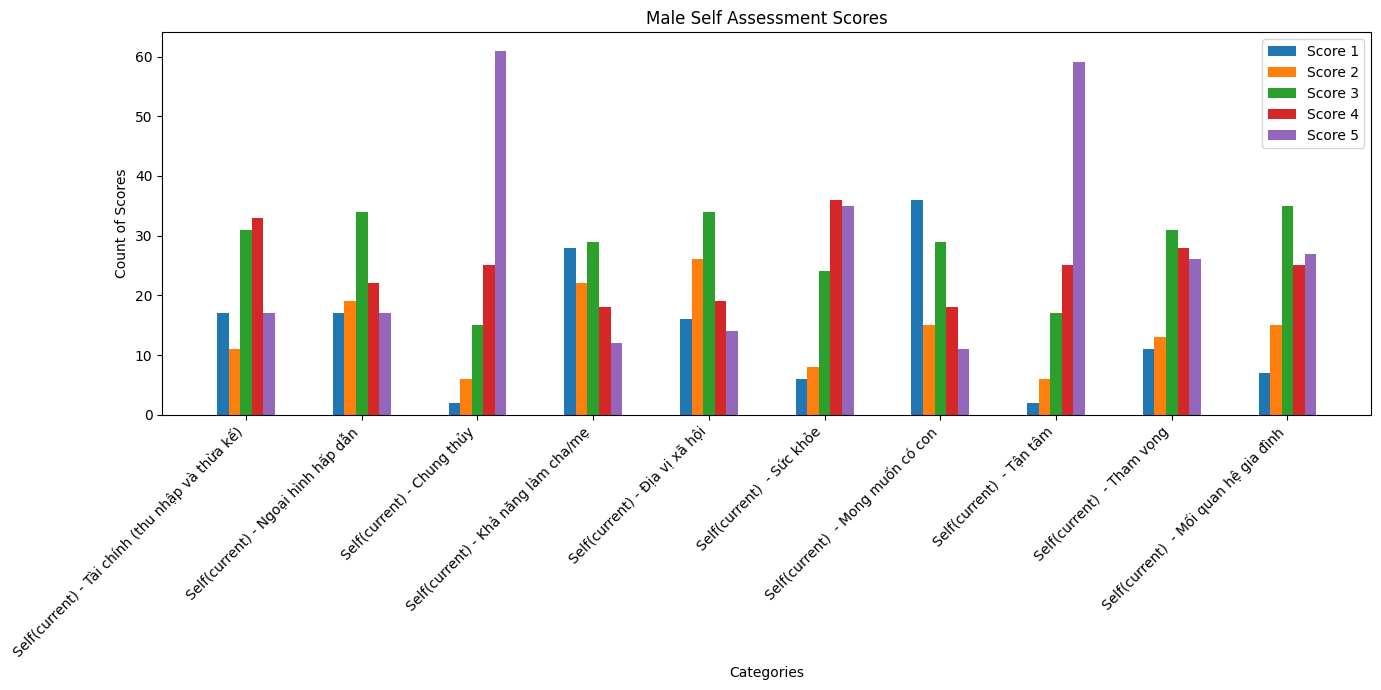

<ipython-input-8-19ffcac71d65>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  bar_positions = pd.np.arange(len(assessment_columns))


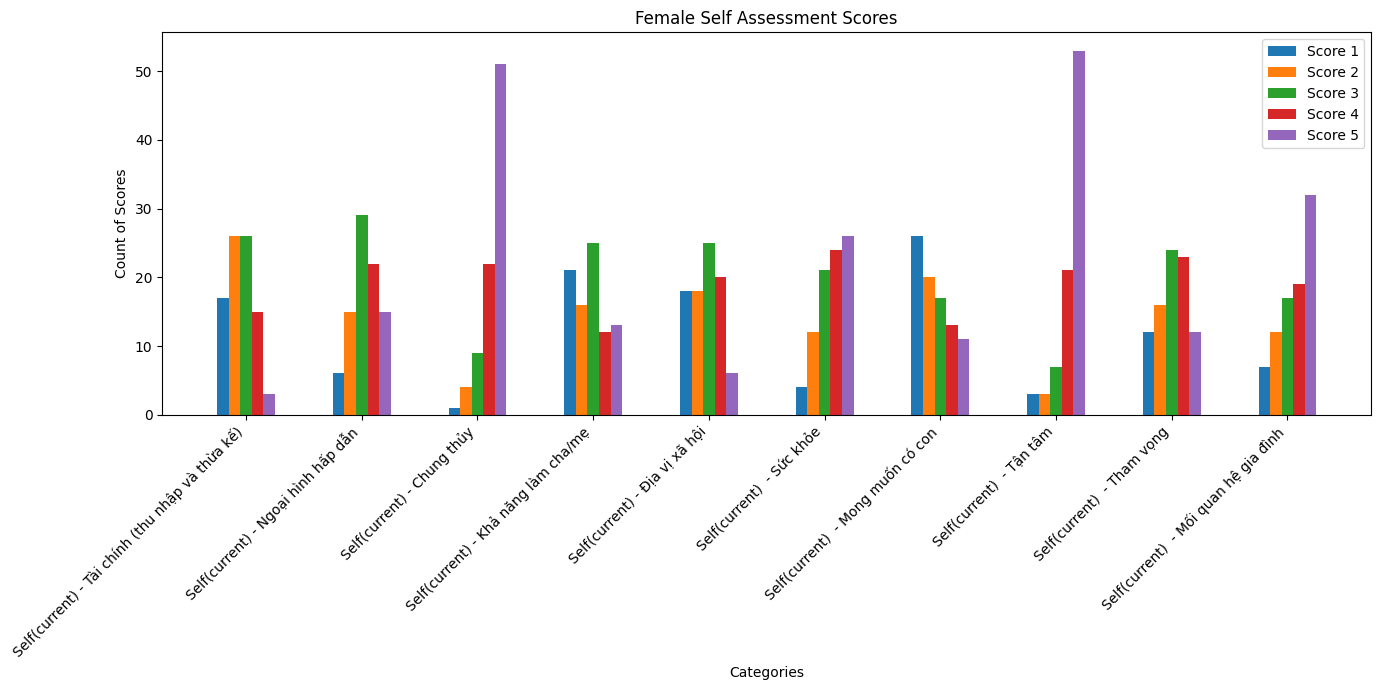

In [ ]:

# Chọn các cột cho self assessment
columns_self_current_assessment = ['Self(current) - Tài chính (thu nhập và thừa kế)',
       'Self(current) - Ngoại hình hấp dẫn', 'Self(current) - Chung thủy',
       'Self(current) - Khả năng làm cha/mẹ', 'Self(current) - Địa vị xã hội',
       'Self(current)  - Sức khỏe', 'Self(current)  - Mong muốn có con',
       'Self(current)  - Tận tâm', 'Self(current)  - Tham vọng',
       'Self(current)  - Mối quan hệ gia đình',]
# Separate the data by gender
data_male = data[data['Giới tính của bạn:'] == 'Nam']
data_female = data[data['Giới tính của bạn:'] == 'Nữ']
# Function to create bar charts for self(current) assessment scores
def plot_assessment_scores_by_gender(data, gender_label, assessment_columns):
    # Initialize a dictionary to store the count of each score for each category
    score_distribution = {score: [] for score in range(1, 6)}
    for column in assessment_columns:
        column_scores = data[column].value_counts().reindex(range(1, 6), fill_value=0)
        for score in range(1, 6):
            score_distribution[score].append(column_scores[score])

    # Transform the dictionary into a DataFrame for easier plotting
    df_scores = pd.DataFrame(score_distribution, index=assessment_columns)

    # Plotting
    bar_positions = pd.np.arange(len(assessment_columns))
    bar_width = 0.1  # Width of individual bars

    fig, ax = plt.subplots(figsize=(14, 7))

    for i in range(1, 6):
        ax.bar(bar_positions + (i-3)*bar_width, df_scores[i], width=bar_width, label=f'Score {i}')

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(assessment_columns, rotation=45, ha='right')
    ax.set_title(f'{gender_label} Self Assessment Scores')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count of Scores')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot the assessment scores by gender
plot_assessment_scores_by_gender(data_male, 'Male', columns_self_current_assessment)
plot_assessment_scores_by_gender(data_female, 'Female', columns_self_current_assessment)

<ipython-input-5-ba65a6da67f5>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  bar_positions = pd.np.arange(len(assessment_columns))


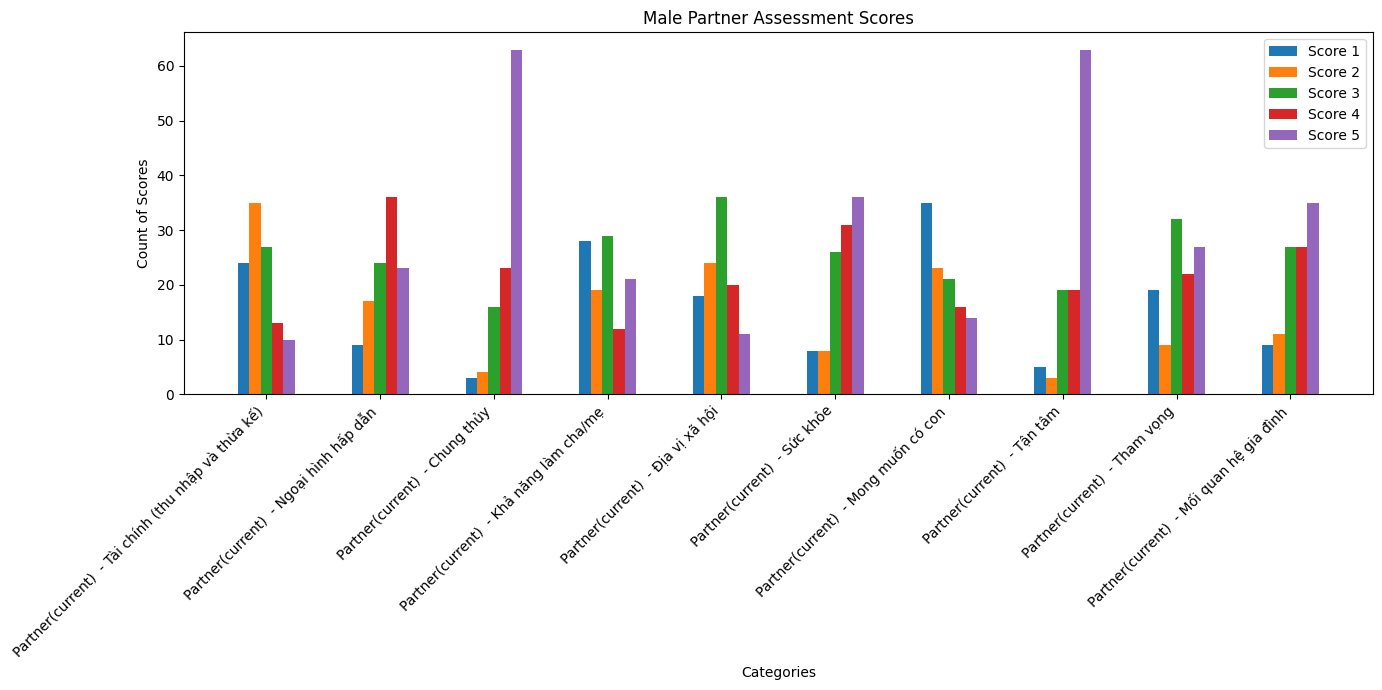

<ipython-input-5-ba65a6da67f5>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  bar_positions = pd.np.arange(len(assessment_columns))


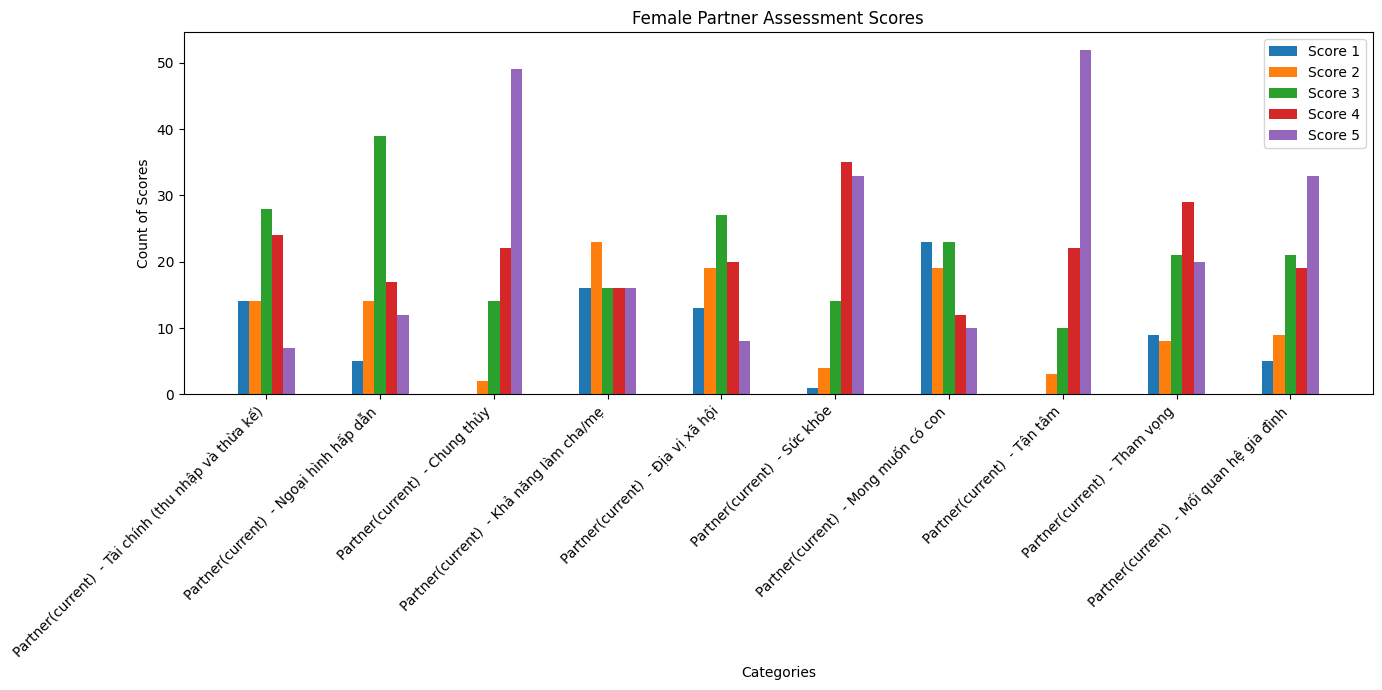

In [ ]:
# Chọn các cột cho self assessment
columns_partner_current_assessment = ['Partner(current)  - Tài chính (thu nhập và thừa kế)',
       'Partner(current)  - Ngoại hình hấp dẫn',
       'Partner(current)  - Chung thủy',
       'Partner(current)  - Khả năng làm cha/mẹ',
       'Partner(current)  - Địa vị xã hội', 'Partner(current)  - Sức khỏe',
       'Partner(current)  - Mong muốn có con', 'Partner(current)  - Tận tâm',
       'Partner(current)  - Tham vọng',
       'Partner(current)  - Mối quan hệ gia đình',]

# Separate the data by gender
data_male = data[data['Giới tính của bạn:'] == 'Nam']
data_female = data[data['Giới tính của bạn:'] == 'Nữ']
# Function to create bar charts for self(current) assessment scores
def plot_assessment_scores_by_gender(data, gender_label, assessment_columns):
    # Initialize a dictionary to store the count of each score for each category
    score_distribution = {score: [] for score in range(1, 6)}
    for column in assessment_columns:
        column_scores = data[column].value_counts().reindex(range(1, 6), fill_value=0)
        for score in range(1, 6):
            score_distribution[score].append(column_scores[score])

    # Transform the dictionary into a DataFrame for easier plotting
    df_scores = pd.DataFrame(score_distribution, index=assessment_columns)

    # Plotting
    bar_positions = pd.np.arange(len(assessment_columns))
    bar_width = 0.1  # Width of individual bars

    fig, ax = plt.subplots(figsize=(14, 7))

    for i in range(1, 6):
        ax.bar(bar_positions + (i-3)*bar_width, df_scores[i], width=bar_width, label=f'Score {i}')

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(assessment_columns, rotation=45, ha='right')
    ax.set_title(f'{gender_label} Partner Assessment Scores')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count of Scores')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot the assessment scores by gender
plot_assessment_scores_by_gender(data_male, 'Male', columns_partner_current_assessment)
plot_assessment_scores_by_gender(data_female, 'Female', columns_partner_current_assessment)

<ipython-input-9-237c6d2e5561>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  bar_positions = pd.np.arange(len(assessment_columns))


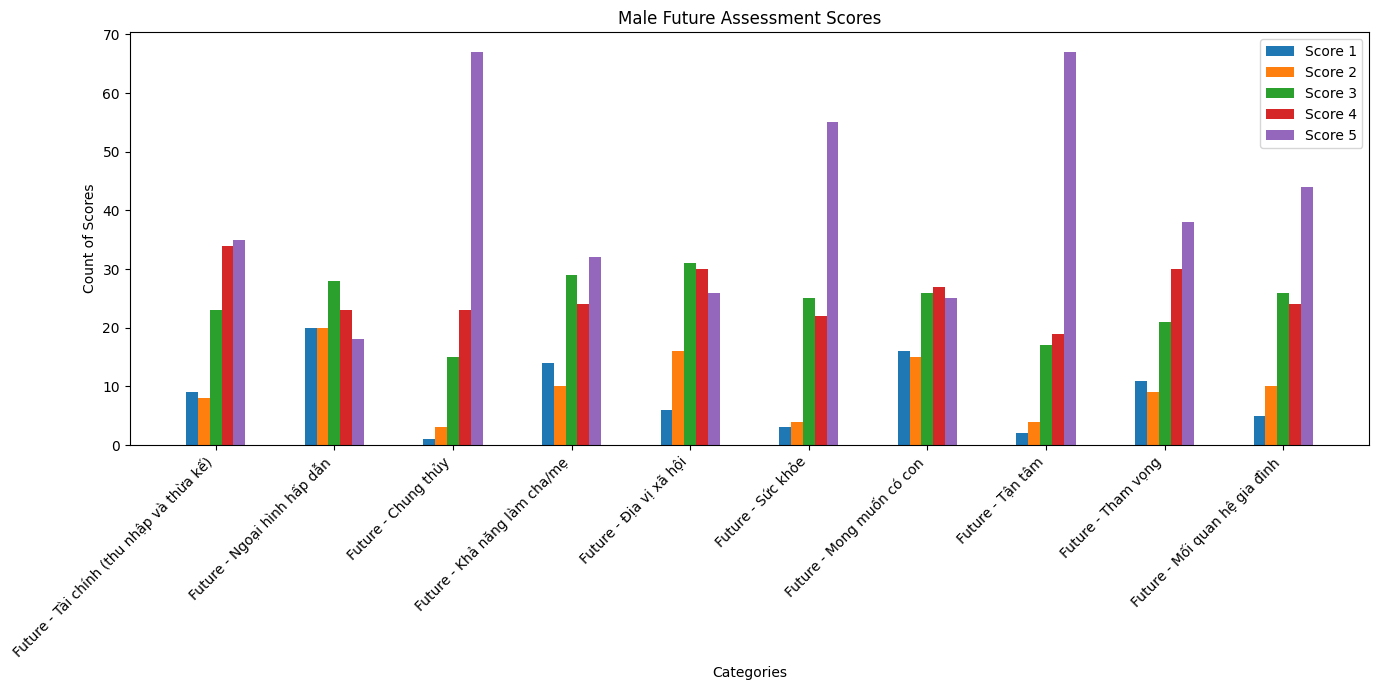

<ipython-input-9-237c6d2e5561>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  bar_positions = pd.np.arange(len(assessment_columns))


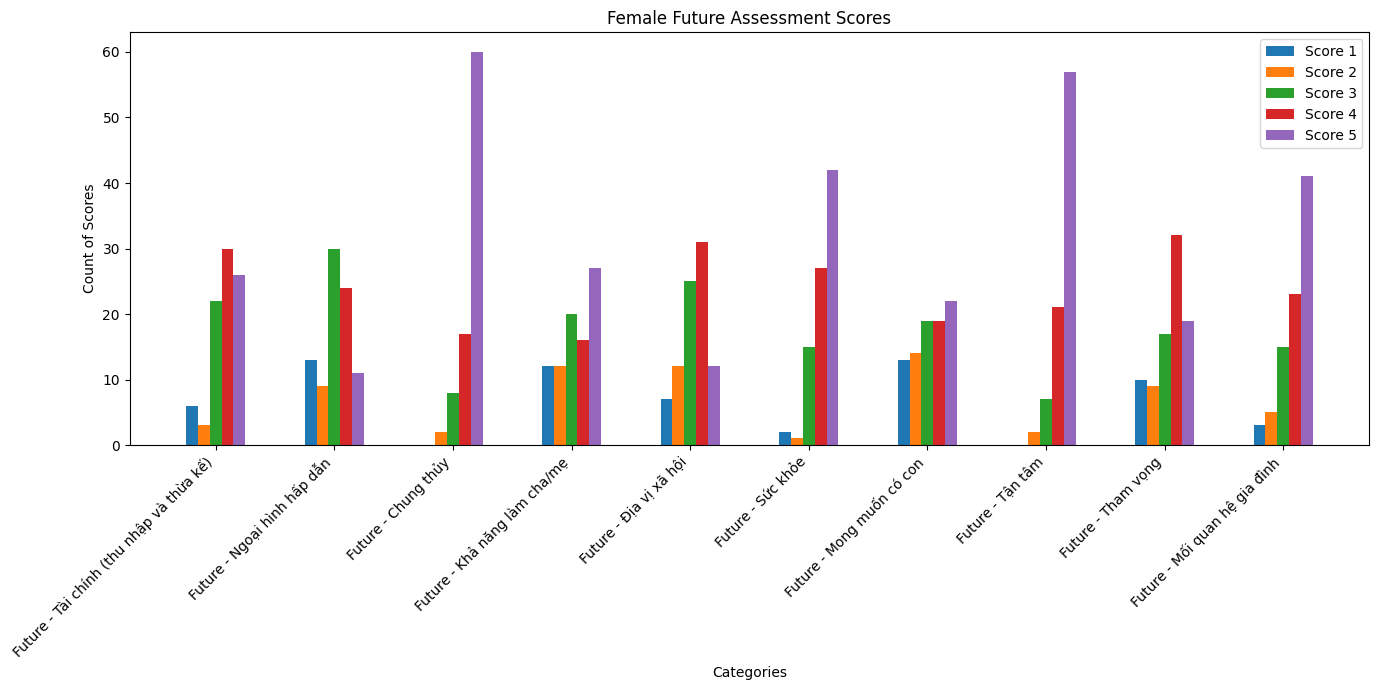

In [ ]:
# Chọn các cột cho self assessment
columns_future_assessment = ['Future - Tài chính (thu nhập và thừa kế)',
       'Future - Ngoại hình hấp dẫn', 'Future - Chung thủy',
       'Future - Khả năng làm cha/mẹ', 'Future - Địa vị xã hội',
       'Future - Sức khỏe', 'Future - Mong muốn có con', 'Future - Tận tâm',
       'Future - Tham vọng', 'Future - Mối quan hệ gia đình',]

# Separate the data by gender
data_male = data[data['Giới tính của bạn:'] == 'Nam']
data_female = data[data['Giới tính của bạn:'] == 'Nữ']
# Function to create bar charts for self(current) assessment scores
def plot_assessment_scores_by_gender(data, gender_label, assessment_columns):
    # Initialize a dictionary to store the count of each score for each category
    score_distribution = {score: [] for score in range(1, 6)}
    for column in assessment_columns:
        column_scores = data[column].value_counts().reindex(range(1, 6), fill_value=0)
        for score in range(1, 6):
            score_distribution[score].append(column_scores[score])

    # Transform the dictionary into a DataFrame for easier plotting
    df_scores = pd.DataFrame(score_distribution, index=assessment_columns)

    # Plotting
    bar_positions = pd.np.arange(len(assessment_columns))
    bar_width = 0.1  # Width of individual bars

    fig, ax = plt.subplots(figsize=(14, 7))

    for i in range(1, 6):
        ax.bar(bar_positions + (i-3)*bar_width, df_scores[i], width=bar_width, label=f'Score {i}')

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(assessment_columns, rotation=45, ha='right')
    ax.set_title(f'{gender_label} Future Assessment Scores')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count of Scores')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot the assessment scores by gender
plot_assessment_scores_by_gender(data_male, 'Male', columns_future_assessment)
plot_assessment_scores_by_gender(data_female, 'Female', columns_future_assessment)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Timestamp',
       'Tên đại diện cho cặp đôi của bạn (Bạn và đối phương sẽ thống nhất 1 biệt danh đại diện cho cặp đôi của mình)',
       'Ngày tháng năm sinh của bạn:', 'Giới tính của bạn:',
       'Trình độ học vấn cao nhất của bạn? ',
       'Thu nhập hàng tháng của bạn là bao nhiêu?\n(đơn vị :VNĐ)',
       'Hai bạn quen nhau được bao lâu rồi? (Đơn vị tính: tháng)',
       'Đặc điểm chung của gia đình hai bên\n',
       'Self(first) - Tài chính (thu nhập và thừa kế)',
       'Self(first) - Ngoại hình hấp dẫn', 'Self(first) - Chung thủy',
       'Self(first) - Khả năng làm cha/mẹ', 'Self(first) - Địa vị xã hội',
       'Self(first) - Sức khỏe', 'Self(first) - Mong muốn có con',
       'Self(first) - Tận tâm', 'Self(first) - Tham vọng',
       'Self(first) - Mối quan hệ gia đình',
       'Partner(first) - Tài chính (thu nhập và thừa kế)',
       'Partner(first) - Ngoại hình hấp dẫn', 'Partner(first) - Chung thủy',
       'Partner(first) - Khả năng làm cha/mẹ',
  

In [ ]:
data.columns

Index(['Unnamed: 0', 'Timestamp',
       'Tên đại diện cho cặp đôi của bạn (Bạn và đối phương sẽ thống nhất 1 biệt danh đại diện cho cặp đôi của mình)',
       'Ngày tháng năm sinh của bạn:', 'Giới tính của bạn:',
       'Trình độ học vấn cao nhất của bạn? ',
       'Thu nhập hàng tháng của bạn là bao nhiêu?\n(đơn vị :VNĐ)',
       'Hai bạn quen nhau được bao lâu rồi? (Đơn vị tính: tháng)',
       'Đặc điểm chung của gia đình hai bên\n',
       'Self(first) - Tài chính (thu nhập và thừa kế)',
       'Self(first) - Ngoại hình hấp dẫn', 'Self(first) - Chung thủy',
       'Self(first) - Khả năng làm cha/mẹ', 'Self(first) - Địa vị xã hội',
       'Self(first) - Sức khỏe', 'Self(first) - Mong muốn có con',
       'Self(first) - Tận tâm', 'Self(first) - Tham vọng',
       'Self(first) - Mối quan hệ gia đình',
       'Partner(first) - Tài chính (thu nhập và thừa kế)',
       'Partner(first) - Ngoại hình hấp dẫn', 'Partner(first) - Chung thủy',
       'Partner(first) - Khả năng làm cha/mẹ',
  

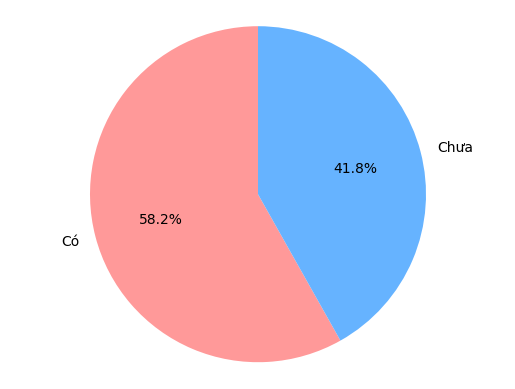

In [ ]:
pie_chart_have_you_love=data['Bạn đã từng quen người yêu trước'].value_counts()

#Tạo biểu đồ

labels=pie_chart_have_you_love.index
size=pie_chart_have_you_love.values
colors=['#ff9999','#66b3ff']
fig1,ax1=plt.subplots()
ax1.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# Hiển thị biểu đồ
plt.show()







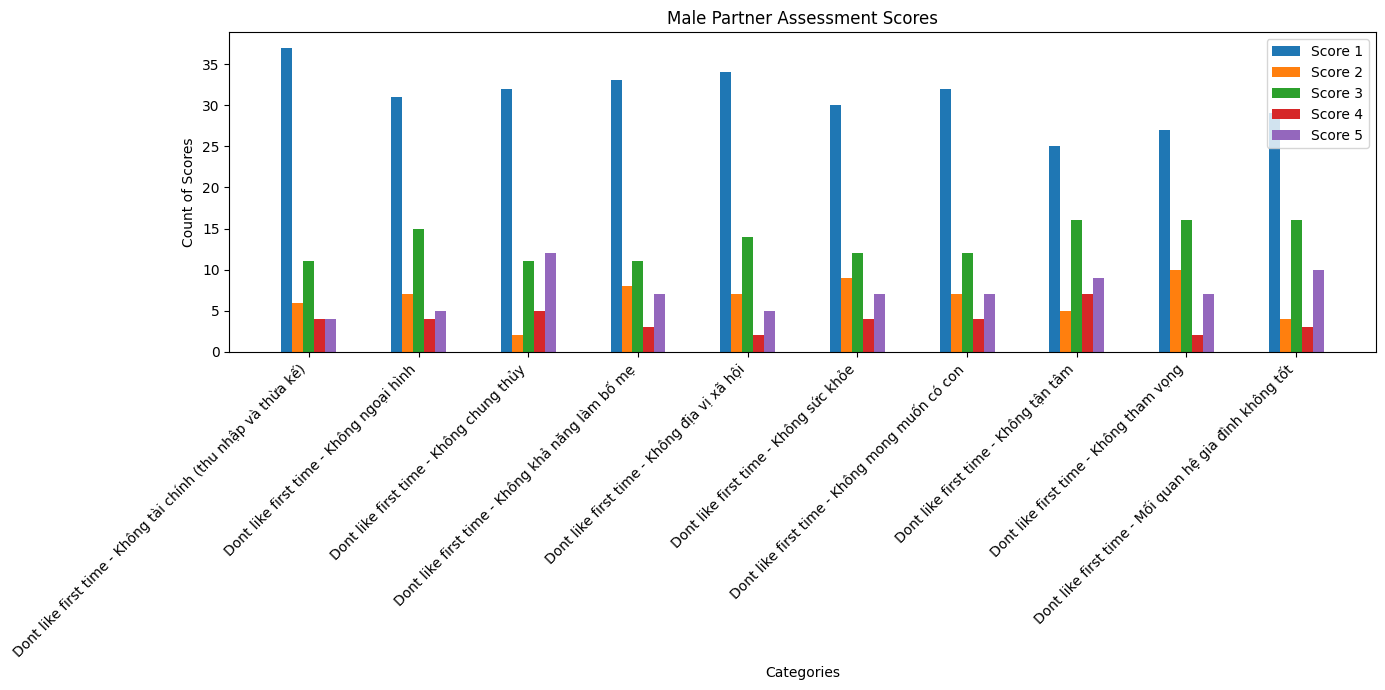

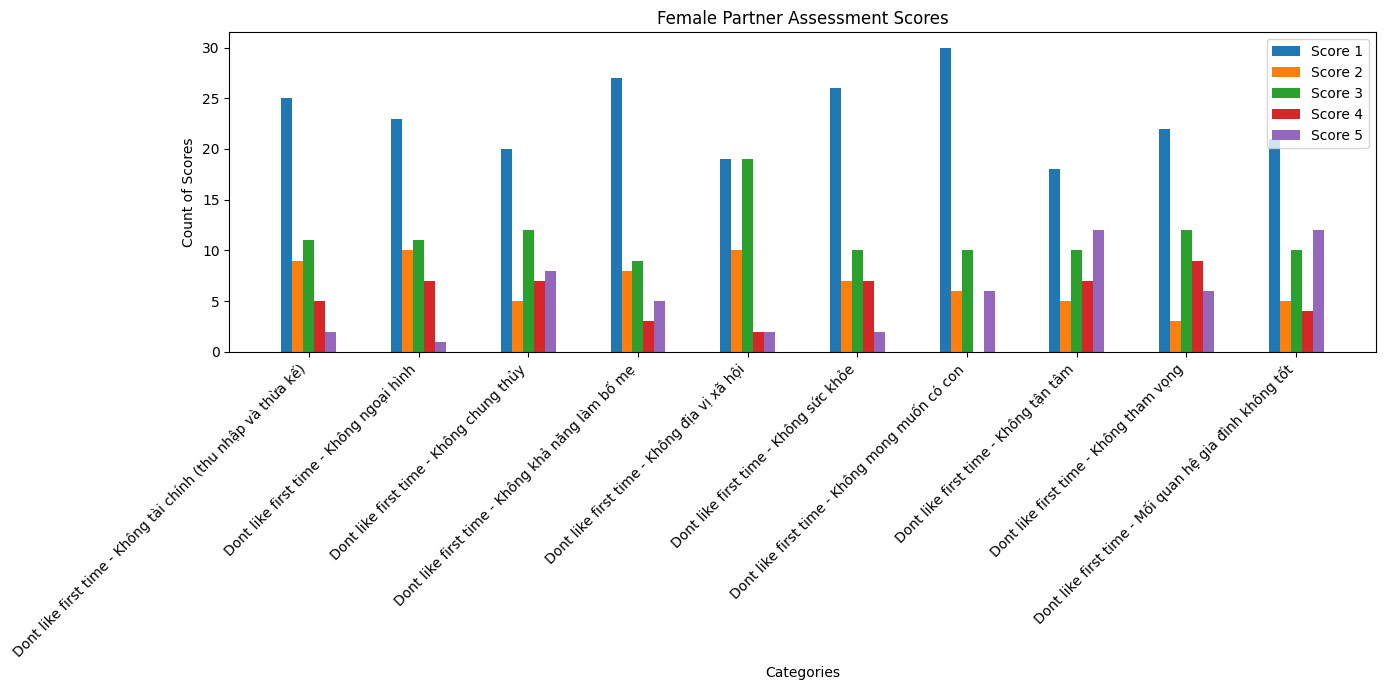

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined the variables data_male, data_female, and columns_breakupfirst_assessment

# Function to create bar charts for self(current) assessment scores
def plot_assessment_scores_by_gender(data, gender_label, assessment_columns):
    # Initialize a dictionary to store the count of each score for each category
    score_distribution = {score: [] for score in range(1, 6)}
    for category in assessment_columns:
        for column in category:
            column_scores = data[column].value_counts().reindex(range(1, 6), fill_value=0)
            for score in range(1, 6):
                score_distribution[score].append(column_scores[score])

    # Transform the dictionary into a DataFrame for easier plotting
    df_scores = pd.DataFrame(score_distribution, index=np.concatenate(assessment_columns))

    # Plotting
    bar_positions = np.arange(len(df_scores.index))
    bar_width = 0.1  # Width of individual bars

    fig, ax = plt.subplots(figsize=(14, 7))

    for i in range(1, 6):
        ax.bar(bar_positions + (i-3)*bar_width, df_scores[i], width=bar_width, label=f'Score {i}')

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(df_scores.index, rotation=45, ha='right')
    ax.set_title(f'{gender_label} Partner Assessment Scores')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count of Scores')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot the assessment scores by gender
plot_assessment_scores_by_gender(data_male, 'Male', columns_breakupfirst_assessment)
plot_assessment_scores_by_gender(data_female, 'Female', columns_breakupfirst_assessment)

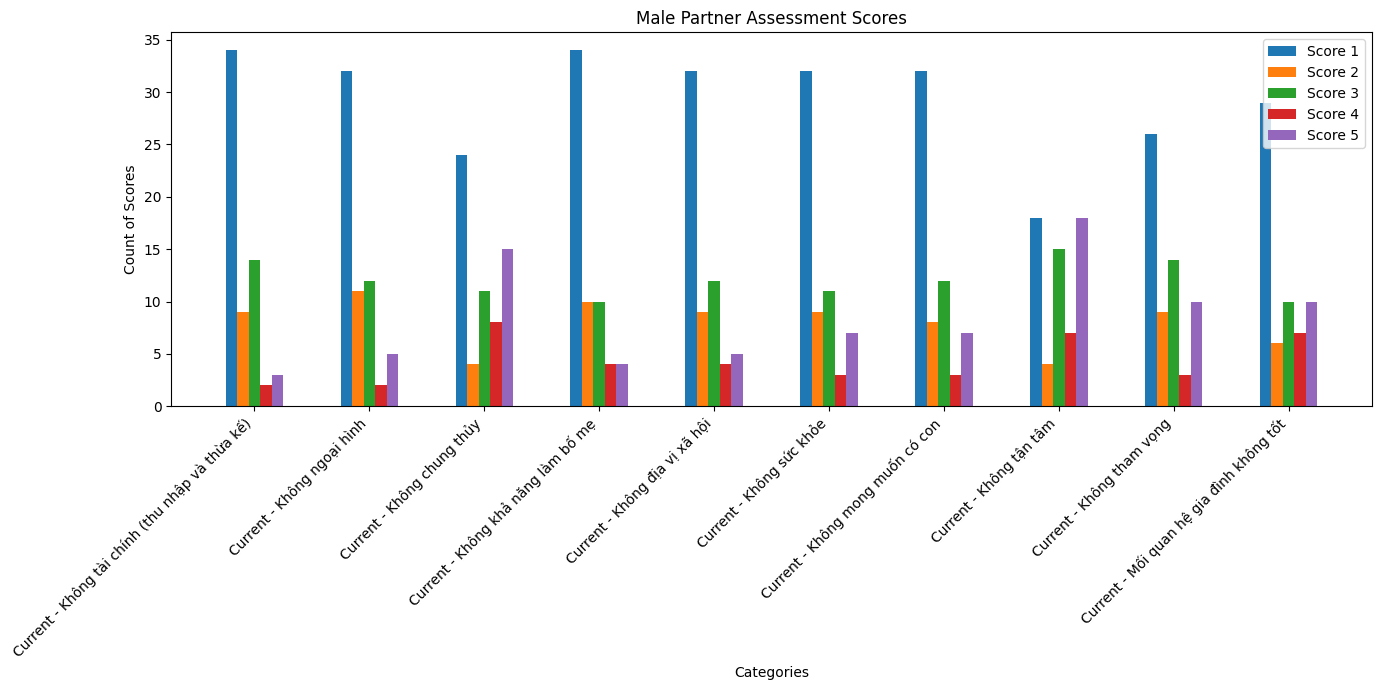

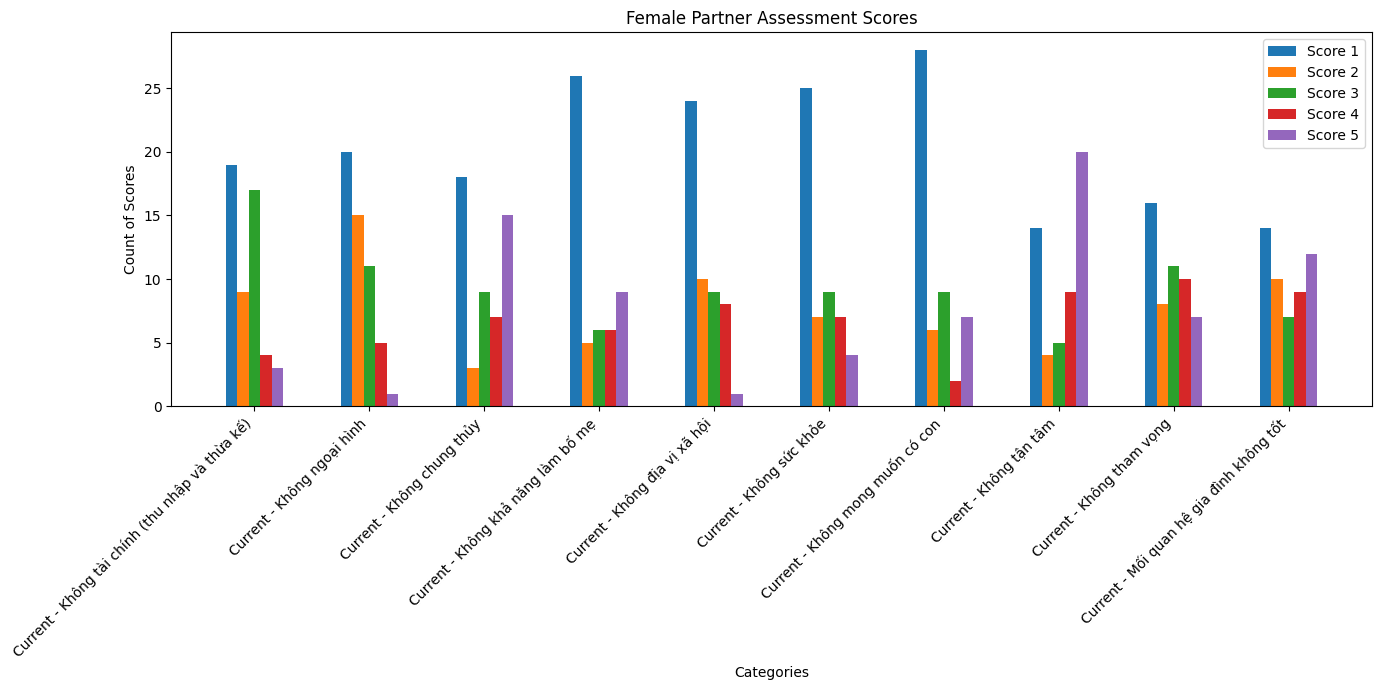

In [ ]:
# Chọn các cột cho self assessment
columns_breakup_current_assessment = [[   'Current - Không tài chính (thu nhập và thừa kế)',
       'Current - Không ngoại hình', 'Current - Không chung thủy',
       'Current - Không khả năng làm bố mẹ', 'Current - Không địa vị xã hội',
       'Current - Không sức khỏe', 'Current - Không mong muốn có con',
       'Current - Không tận tâm', 'Current - Không tham vọng',
       'Current - Mối quan hệ gia đình không tốt',]]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Function to create bar charts for self(current) assessment scores
def plot_assessment_scores_by_gender(data, gender_label, assessment_columns):
    # Initialize a dictionary to store the count of each score for each category
    score_distribution = {score: [] for score in range(1, 6)}
    for category in assessment_columns:
        for column in category:
            column_scores = data[column].value_counts().reindex(range(1, 6), fill_value=0)
            for score in range(1, 6):
                score_distribution[score].append(column_scores[score])

    # Transform the dictionary into a DataFrame for easier plotting
    df_scores = pd.DataFrame(score_distribution, index=np.concatenate(assessment_columns))

    # Plotting
    bar_positions = np.arange(len(df_scores.index))
    bar_width = 0.1  # Width of individual bars

    fig, ax = plt.subplots(figsize=(14, 7))

    for i in range(1, 6):
        ax.bar(bar_positions + (i-3)*bar_width, df_scores[i], width=bar_width, label=f'Score {i}')

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(df_scores.index, rotation=45, ha='right')
    ax.set_title(f'{gender_label} Partner Assessment Scores')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count of Scores')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot the assessment scores by gender
plot_assessment_scores_by_gender(data_male, 'Male', columns_breakup_current_assessment)
plot_assessment_scores_by_gender(data_female, 'Female', columns_breakup_current_assessment)

Tìm hiểu 4,5 ở cột"Mối quan hệ gia đình không tốt dẫn tới chia tay"(done)

In [ ]:
individuals_with_issues = data[data['Current - Mối quan hệ gia đình không tốt'].isin([4, 5])]
# Adding a column for age calculation
current_year = pd.Timestamp('today').year
individuals_with_issues['Age'] = current_year - pd.to_datetime(individuals_with_issues['Ngày tháng năm sinh của bạn:']).dt.year

# Selecting the required columns for education level, income, and age
required_columns = [
    'Trình độ học vấn cao nhất của bạn? ',  # Education level
    'Thu nhập hàng tháng của bạn là bao nhiêu?\n(đơn vị :VNĐ)',  # Income
    'Age',  # Age
    'Tên đại diện cho cặp đôi của bạn (Bạn và đối phương sẽ thống nhất 1 biệt danh đại diện cho cặp đôi của mình)',
    'Giới tính của bạn:'
]


# Extracting the required information
result = individuals_with_issues[required_columns]

print(result)

    Trình độ học vấn cao nhất của bạn?   \
0                               Đại học   
1                             Trung Cấp   
2                              Cao Đẳng   
3                               Đại học   
14                              Đại học   
20                              Đại học   
23                              Đại học   
31                              Tiến sĩ   
56          Trung học phổ thông (Cấp 3)   
57                              Tiến sĩ   
58                              Đại học   
81                              Đại học   
82                              Đại học   
86                              Đại học   
92                              Đại học   
95                              Đại học   
96                              Đại học   
99                              Đại học   
106                             Đại học   
107                             Đại học   
108                             Đại học   
112                             Đại học   
118        

<ipython-input-6-0330e24d6ee6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individuals_with_issues['Age'] = current_year - pd.to_datetime(individuals_with_issues['Ngày tháng năm sinh của bạn:']).dt.year


In [ ]:
data=pd.read_excel('Score.xlsx')
# Tính toán cho Extraversion
data['Sự hướng ngoại'] = (data['Bạn là người như thế nào [Hướng ngoại, nhiệt tình.]'] + (6 - data['Bạn là người như thế nào [Kín đáo, yên tĩnh.]'])) / 2

# Tính toán cho Agreeableness
data['Sự thân thiện, dễ hòa đồng'] = ((6 - data['Bạn là người như thế nào [Cảm thông, ấm áp.]']) + data['Bạn là người như thế nào [Phê phán, hay tranh cãi.]']) / 2

# Tính toán cho Conscientiousness
data['Sự tỉ mỉ, cẩn thận'] = (data['Bạn là người như thế nào [Đáng tin cậy, tự giác.]'] + (6 - data['Bạn là người như thế nào [Bừa bộn, cẩu thả.]'])) / 2

# Tính toán cho Emotional Stability
data['Sự ổn định cảm xúc'] = ((6 - data['Bạn là người như thế nào [Bình tĩnh, ổn định cảm xúc.]']) + data['Bạn là người như thế nào [Lo lắng, dễ bị kích động.]']) / 2

# Tính toán cho Openness to Experiences
data['Sự mở lòng đối với trải nghiệm mớ'] = (data['Bạn là người như thế nào [Sẵn lòng trải nghiệm mới, phức tạp.]'] + (6 - data['Bạn là người như thế nào [Theo truyền thống, không sáng tạo.]'])) / 2

# Xóa các cột cũ
columns_to_drop = [
    'Bạn là người như thế nào [Hướng ngoại, nhiệt tình.]',
    'Bạn là người như thế nào [Kín đáo, yên tĩnh.]',
    'Bạn là người như thế nào [Cảm thông, ấm áp.]',
    'Bạn là người như thế nào [Phê phán, hay tranh cãi.]',
    'Bạn là người như thế nào [Đáng tin cậy, tự giác.]',
    'Bạn là người như thế nào [Bừa bộn, cẩu thả.]',
    'Bạn là người như thế nào [Bình tĩnh, ổn định cảm xúc.]',
    'Bạn là người như thế nào [Lo lắng, dễ bị kích động.]',
    'Bạn là người như thế nào [Sẵn lòng trải nghiệm mới, phức tạp.]',
    'Bạn là người như thế nào [Theo truyền thống, không sáng tạo.]'
]
data.drop(columns=columns_to_drop, inplace=True)

# Hiển thị một số hàng đầu tiên để xác nhận các thay đổi
data.head()



Timestamp  \
0 2023-11-10 10:09:09.933   
1 2023-11-10 22:17:20.400   
2 2023-11-10 22:45:02.424   
3 2023-11-10 23:24:40.600   
4 2023-11-11 09:17:36.813   

  Tên đại diện cho cặp đôi của bạn (Bạn và đối phương sẽ thống nhất 1 biệt danh đại diện cho cặp đôi của mình)  \
0                                             BiLinh                                                             
1                                        Nước vs lửa                                                             
2                                           Khum coá                                                             
3                                                TAT                                                             
4                                               Tứng                                                             

  Ngày tháng năm sinh của bạn: Giới tính của bạn:  \
0                   2001-10-08                Nam   
1                   2001-08-24                Nam   
2                   2001-03-29                Nam   
3                   2002-09-17                 Nữ   
4                   2001-09-01                Nam   

  Trình độ học vấn cao nhất của bạn?   \
0                             Đại học   
1                           Trung Cấp   
2                            Cao Đẳng   
3                             Đại học   
4                             Đại học   

  Thu nhập hàng tháng của bạn là bao nhiêu?\n(đơn vị :VNĐ)  \
0                                            2 triệu         
1                                            6000000         
2                                          8.000.000         
3                                          3.000.000         
4                                            4500000         

  Hai bạn quen nhau được bao lâu rồi? (Đơn vị tính: tháng)  \
0                                            2 tháng         
1                                            5 tháng         
2                                           60 tháng         
3                                                 17         
4                                                  0         

               Đặc điểm chung của gia đình hai bên\n  \
0                                           Tôn giáo   
1       Không có đặc điểm chung của hai bên gia đình   
2  Phong cách nuôi dạy con cái, Tôn giáo, Nền tản...   
3     Phong cách nuôi dạy con cái, Nền tảng gia đình   
4       Không có đặc điểm chung của hai bên gia đình   

   Bạn cảm thấy yếu tố nào ở BẢN THÂN là quan trọng trong LẦN GẶP MẶT ĐẦU TIÊN?\n*Tích vào 1 (Hoàn toàn không quan trọng) -> 5 (Hoàn toàn quan trọng) [Tài chính (thu nhập và thừa kế)]  \
0                                                  5                                                                                                                                      
1                                                  1                                                                                                                                      
2                                                  4                                                                                                                                      
3                                                  2                                                                                                                                      
4                                                  3                                                                                                                                      

   Bạn cảm thấy yếu tố nào ở BẢN THÂN là quan trọng trong LẦN GẶP MẶT ĐẦU TIÊN?\n*Tích vào 1 (Hoàn toàn không quan trọng) -> 5 (Hoàn toàn quan trọng) [Ngoại hình hấp dẫn]  \
0                                                  5                                                                                                                         
1                                   

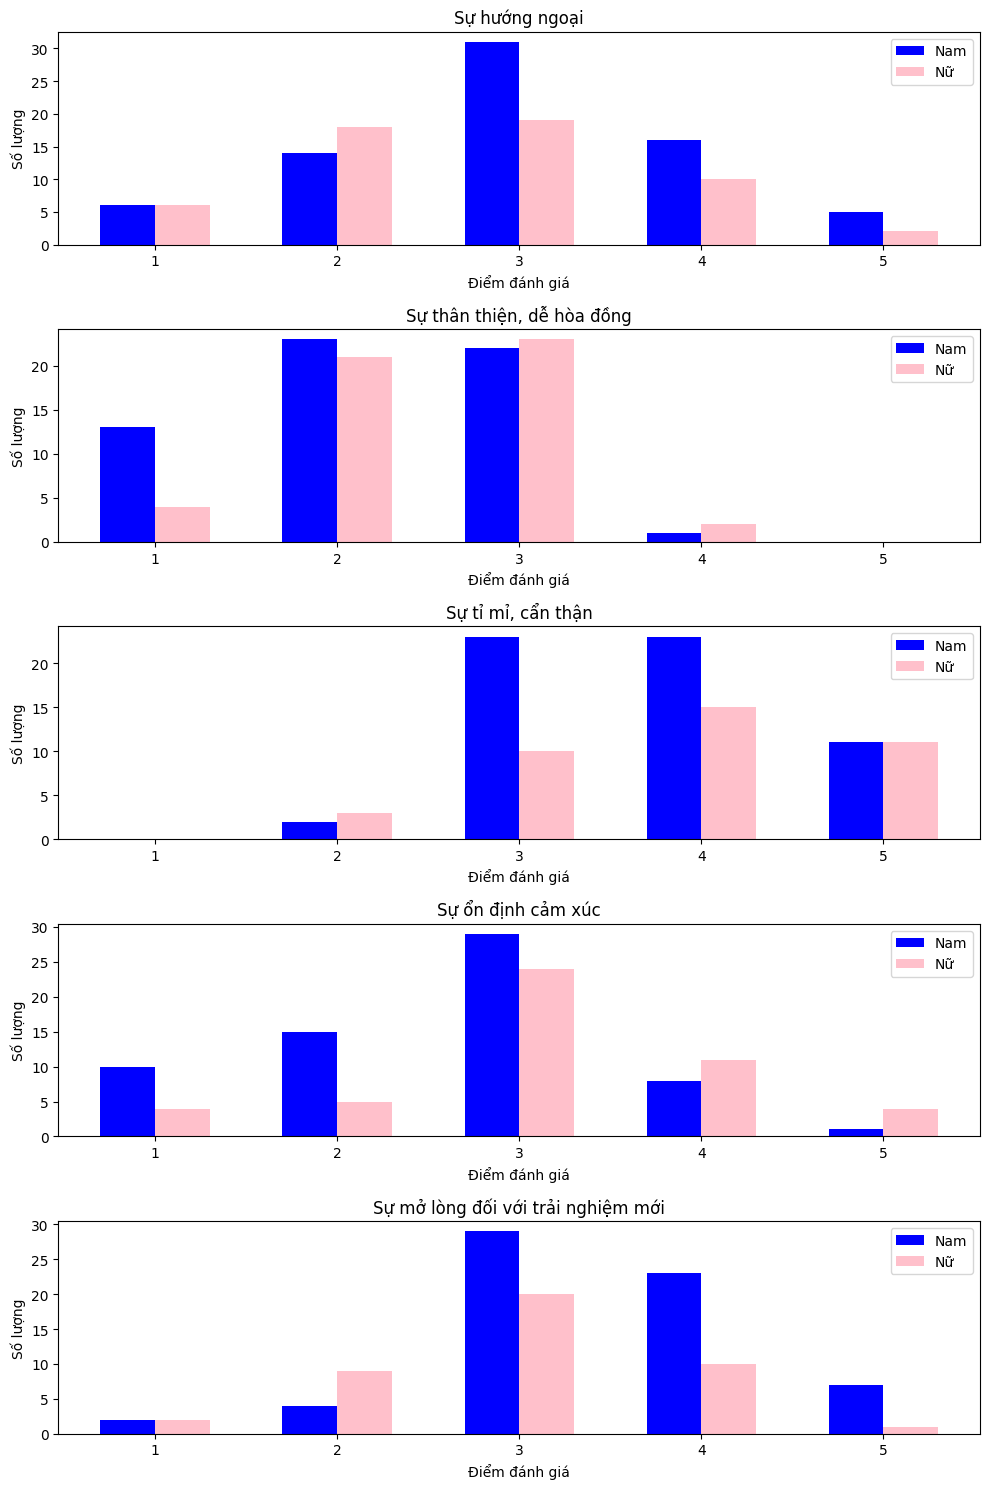

In [ ]:
gender_col="Giới tính của bạn:"
trait_cols=data.columns[-5:]

colors={'Nam': 'blue','Nữ':'pink'}

fig,axes = plt.subplots(len(trait_cols),figsize=(10,15),tight_layout=True)

for i, trait in enumerate(trait_cols):
    ax = axes[i]
    # For each gender, get the value counts of the trait scores and sort by index (score)
    for gender in ['Nam', 'Nữ']:
        trait_data = data[data[gender_col] == gender][trait].value_counts().sort_index()
        # Ensure all possible rating points are represented in the data
        all_ratings = np.arange(1, 6)  # Ratings from 1 to 5
        trait_data = trait_data.reindex(all_ratings, fill_value=0)

        # Vẽ các bar cho nam và nữ
        ax.bar(trait_data.index - 0.15 if gender == 'Nam' else trait_data.index + 0.15,
               trait_data.values, width=0.3, label=gender, color=colors[gender], align='center')

    ax.set_title(trait)
    ax.set_xlabel('Điểm đánh giá')
    ax.set_ylabel('Số lượng')
    ax.set_xticks(all_ratings)  # Set x-ticks to be whole numbers from 1 to 5
    ax.legend()

# Show the plot
plt.show()



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_data.xlsx to processed_data.xlsx


In [ ]:
import pandas as pd

# Đường dẫn đến file XLSX
file_path = 'hehe.xlsx'

# Đọc file XLSX và tạo DataFrame
data = pd.read_excel(file_path)

column = data['Sự hướng ngoại']
rounded = np.round(column, 0)
data['Sự hướng ngoại'] = rounded

column1 = data['Sự thân thiện, dễ hòa đồng']
rounded = np.round(column1, 0)
data['Sự thân thiện, dễ hòa đồng'] = rounded

column2 = data['Sự tỉ mỉ, cẩn thận']
rounded = np.round(column2, 0)
data['Sự tỉ mỉ, cẩn thận'] = rounded

column3 = data['Sự ổn định cảm xúc']
rounded = np.round(column3, 0)
data['Sự ổn định cảm xúc'] = rounded

column4 = data['Sự mở lòng đối với trải nghiệm mới']
rounded = np.round(column4, 0)
data['Sự hướng ngoại'] = rounded

data.foot